<a href="https://colab.research.google.com/github/Dieg0Arauj0/projetoNU-infografico/blob/main/TC_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge - Fase 1: Sistema de Suporte a Diagnóstico Médico com Machine Learning**

**Introdução**

Este notebook foi desenvolvido como parte da Fase 1 do Tech Challenge da Pós-Graduação. O projeto geral busca implementar um sistema inteligente de suporte ao diagnóstico para um grande hospital universitário, com o objetivo de auxiliar equipes médicas na análise de exames e no processamento de dados clínicos. A meta é acelerar a triagem, otimizar o tempo dos profissionais e apoiar as decisões médicas de forma mais eficiente.

Nesta primeira etapa, o desafio consiste em construir a base de um sistema de Inteligência Artificial focado em Machine Learning. Para isso, desenvolveremos uma solução de classificação que, a partir de uma base de dados estruturada (em tabela), será capaz de realizar um diagnóstico, indicando se "a pessoa tem ou não uma doença".

**Problema e Dataset**

Para este trabalho, o problema escolhido foi a previsão de Acidente Vascular Cerebral (AVC). Utilizaremos o dataset healthcare-dataset-stroke-data.csv, que contém dados demográficos e clínicos de pacientes. O nosso objetivo é treinar modelos de aprendizado de máquina para identificar os fatores de risco e prever a probabilidade de um paciente sofrer um AVC.

In [549]:
# Importando bibliotecas para manipulação e análise de dados
import pandas as pd
import numpy as np

In [550]:
# Carregar o dataset usando o nome do arquivo
dados = pd.read_csv("/content/sample_data/healthcare-dataset-stroke-data.csv")

## 2. Análise Exploratória de Dados (EDA)

Nesta etapa, vamos explorar os dados para entender suas características, distribuições e as relações entre as variáveis. Uma boa análise exploratória é fundamental para guiar as etapas de pré-processamento e a escolha dos modelos.

### 2.1. Distribuição das Variáveis Numéricas

Começamos analisando a distribuição das principais variáveis contínuas (`age`, `avg_glucose_level`, `bmi`) para identificar tendências e a presença de outliers.

### 2.2. Visão Geral e Dicionário de Dados

O dataset possui **5110 registros** e **12 colunas**. A análise inicial com `.info()` revela que a coluna `bmi` (IMC) tem 201 valores nulos. A maioria das colunas é numérica (`int64`, `float64`), com algumas categóricas (`object`).

**Dicionário de Dados:**

| Coluna | Descrição | Grau de Importância |
|--------|-----------|----------------------------|
| `id` | Identificador único do paciente | Não é útil para modelagem, serve apenas para referência. |
| `gender` | Gênero do paciente (Male, Female, Other) | Pode influenciar o risco, diferenças hormonais e sociais. |
| `age` | Idade do paciente em anos | **ALTA** - Principal fator de risco, aumenta significativamente com idade. |
| `hypertension` | Hipertensão (0 = não, 1 = sim) | **ALTA** - Condição médica diretamente relacionada ao AVC. |
| `heart_disease` | Doença cardíaca (0 = não, 1 = sim) | **ALTA** - Doenças cardíacas aumentam substancialmente o risco. |
| `ever_married` | Estado civil (Yes ou No) | Proxy para apoio social e fatores socioeconômicos. |
| `work_type` | Tipo de trabalho ("children", "Govt_jov", "Never_worked", "Private" ou "Self-employed") | Indica status socioeconômico e estilo de vida. |
| `Residence_type` | Tipo de residência (Urban, Rural) | Fatores ambientais e acesso a serviços de saúde. |
| `avg_glucose_level` | Nível médio de glicose no sangue | **ALTA** - Indicador de diabetes, fator de risco estabelecido. |
| `bmi` | Índice de Massa Corporal | **MODERADA/ALTA** - Obesidade associada a risco cardiovascular. |
| `smoking_status` | Status de tabagismo ("formerly smoked", "never smoked", "smokes" ou "Unknown") | **ALTA** - Tabagismo é fator de risco modificável principal. |
| `stroke` | **Variável target**: ocorrência de AVC | **TARGET** - Variável a ser predita pelo nosso modelo. |


In [551]:
# nomes das colunas estão corretos, os dados parecem fazer sentido
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [552]:
# Conhecendo a quantidade de linhas e colunas existem dentro do dataset
dados.shape

(5110, 12)

In [553]:
# Variável target
set(dados.stroke)

{0, 1}

In [554]:
dados.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [555]:
# Conhecendo os tipos de dados de cada coluna que existe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [556]:
# Exclusão da coluna de id ( dados irrelevantes para nosso modelo de predição )
dados = dados.drop('id', axis=1)

print(dados.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


### 2.2. Matriz de Correlação

Para investigar a relação linear entre as variáveis, geramos uma matriz de correlação apenas com as variáveis numéricas. O heatmap abaixo nos ajuda a visualizar rapidamente quais variáveis estão mais correlacionadas com a variável alvo (`stroke`) e a detectar possíveis multicolinearidades entre as features.

**Análise:** Como esperado, a **idade (`age`)** é a variável com a correlação positiva mais forte com a ocorrência de AVC, seguida pelo **nível médio de glicose (`avg_glucose_level`)**.

Após tratativa das variáveis categoróricas iremos criar uma nova matriz afim de analisar se há outras correlações

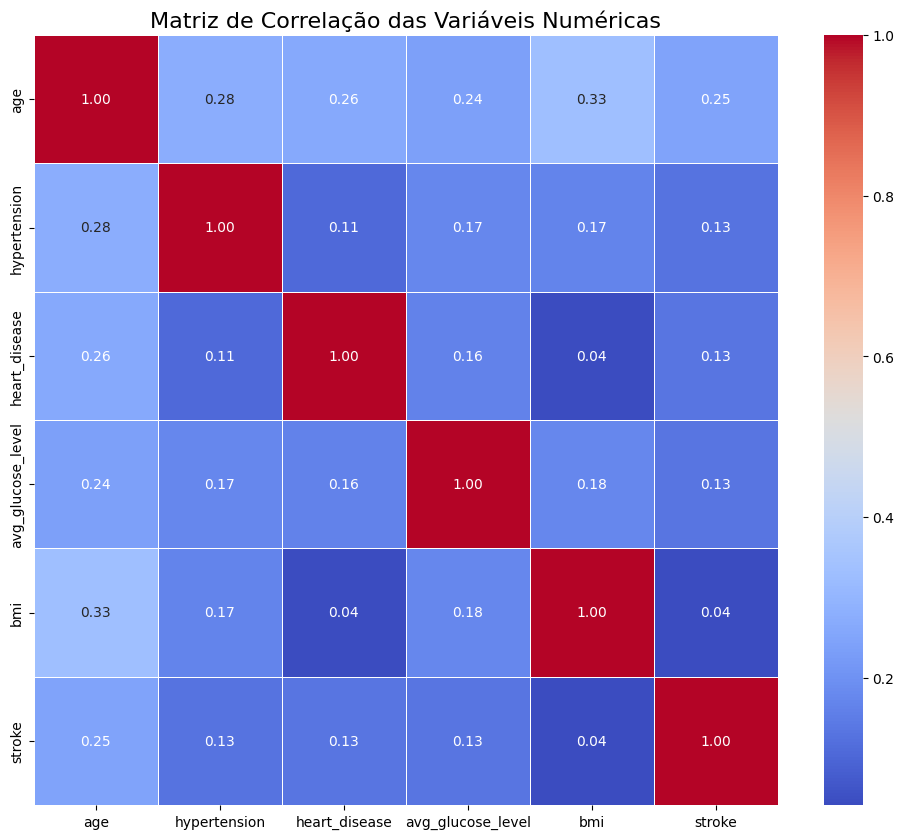

In [557]:
# Valores próximos a +1 indicam uma forte correlação positiva (à medida que uma variável aumenta, a outra tende a aumentar).
# Valores próximos a -1 indicam uma forte correlação negativa (à medida que uma variável aumenta, a outra tende a diminuir).
# Valores próximos a 0 indicam baixa ou nenhuma correlação linear.

import matplotlib.pyplot as plt
import seaborn as sns

dados_numericos = dados.select_dtypes(include=np.number)

correlacao = dados_numericos.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

### 2.3. Análise de Variáveis Categóricas vs. Ocorrência de AVC

Agora, vamos aprofundar a análise visualizando a proporção de casos de AVC dentro de cada categoria das nossas principais variáveis binárias e categóricas.

<Axes: >

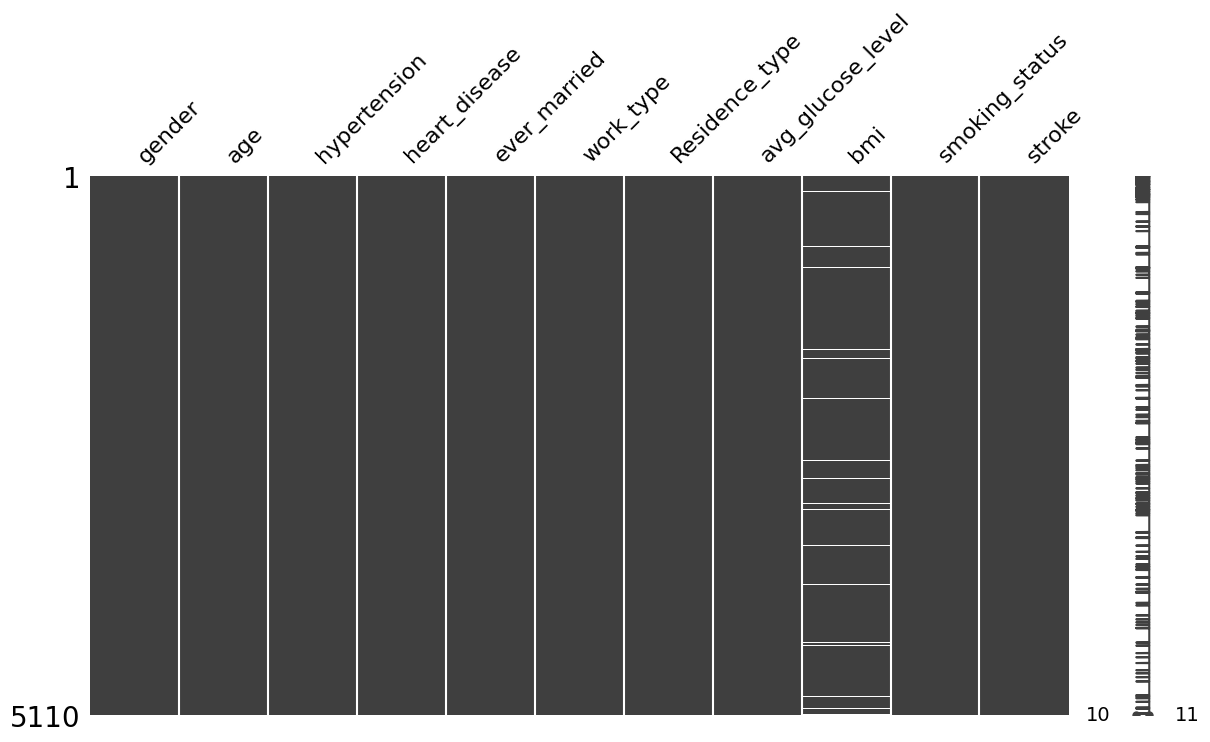

In [558]:
# Importação da lib, para identificarmos valores nulos
import missingno as msno
msno.matrix(dados,figsize=(14, 7))

## 3. Limpeza e Pré-processamento dos Dados

Os dados brutos raramente estão prontos para serem usados em modelos de machine learning. Nesta seção, vamos realizar a limpeza e as transformações necessárias, como tratamento de valores nulos, outliers e variáveis categóricas.

### 3.1. Tratamento de Valores Nulos

Identificamos que a coluna `bmi` (IMC) continha 201 valores nulos. Para não perdermos essas linhas de dados, optamos por preencher esses valores utilizando a **mediana**. A mediana é uma escolha robusta, pois é menos sensível a outliers do que a média.

In [559]:
# Somente a coluna de BMI tem dados nulos
dados.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [560]:
# Pegar a mediana da coluna de bmi
dados['bmi'].fillna(value=dados['bmi'].median(), inplace=True)

print("Valores nulos após o tratamento:")
print(dados.isnull().sum())

Valores nulos após o tratamento:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


/tmp/ipython-input-945509600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['bmi'].fillna(value=dados['bmi'].median(), inplace=True)


In [561]:
# Conhecendo os tipos de dados
dados['ever_married'].value_counts()

,count
ever_married,
Yes,3353
No,1757


In [562]:
dados['Residence_type'].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


### Análise da Variável `gender`

Ao analisar a coluna `gender`, notamos a presença de uma categoria "Other" com apenas uma ocorrência. Como essa única entrada representa uma porção insignificante do dataset (aproximadamente 0.02%), seu impacto no desempenho do modelo é mínimo. Devido à isso optamos pela exclusão do dado no dataset.

In [563]:
print(dados['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [564]:
dados = dados[dados['gender'] != 'Other']

print("Linhas com gênero 'Other' removidas.")
print(dados['gender'].value_counts())

Linhas com gênero 'Other' removidas.
gender
Female    2994
Male      2115
Name: count, dtype: int64


In [565]:
# Transformação das colunas binárias
dados['ever_married'] = dados['ever_married'].map({'Yes': 1, 'No': 0})
dados['Residence_type'] = dados['Residence_type'].map({'Urban': 1, 'Rural': 0})
dados['gender'] = dados['gender'].map({'Male': 1, 'Female': 0})
print(dados[['ever_married', 'Residence_type', 'gender']].head())

   ever_married  Residence_type  gender
0             1               1       1
1             1               0       0
2             1               0       1
3             1               1       0
4             1               0       0


In [566]:
# One-Hot Encoding das colunas
colunas_onehot = ['work_type', 'smoking_status']

dados = pd.get_dummies(dados, columns=colunas_onehot, drop_first=True)
print(dados.head())

   gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  67.0             0              1             1               1   
1       0  61.0             0              0             1               0   
2       1  80.0             0              1             1               0   
3       0  49.0             0              0             1               1   
4       0  79.0             1              0             1               0   

   avg_glucose_level   bmi  stroke  work_type_Never_worked  work_type_Private  \
0             228.69  36.6       1                   False               True   
1             202.21  28.1       1                   False              False   
2             105.92  32.5       1                   False               True   
3             171.23  34.4       1                   False               True   
4             174.12  24.0       1                   False              False   

   work_type_Self-employed  work_type_childr

In [567]:
# Quantidade colunas que tem no dataset ( antes 12 , agora 16 após tratativa de One-Hot Encoding)
dados.shape

(5109, 16)

In [568]:
colunas_numericas = dados.select_dtypes(include=['int64', 'float64'])

print(colunas_numericas.columns.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']


### Nova Matriz de Correlação

Com base na nova matriz de correlação que geramos após a tratativa das variáveis categóricas, podemos identificar as principais correlações que são importantes para entender os fatores associados ao AVC neste dataset:


1.   `age` (**Idade**) e `stroke` (**AVC**): Como visto antes esta é a correlação mais forte com a variável alvo (`stroke`), com um valor de **0.25**. Isso confirma que a idade é o fator de risco mais significativo no dataset, com a probabilidade de ocorrência de AVC aumentando consideravelmente com a idade.
2.   `avg_glucose_level` (**Nível Médio de Glicose**) e `stroke` (**AVC**): Há uma correlação positiva moderada de **0.13** entre o nível médio de glicose e o AVC. Isso sugere que níveis mais altos de glicose (relacionados ao diabetes) estão associados a um risco aumentado de AVC.
3.   `heart_disease` (**Doença Cardíaca**) e `stroke` (**AVC**): A presença de doença cardíaca (`heart_disease`) tem uma correlação positiva de **0.13** com o AVC. Isso é esperado, pois doenças cardíacas são um fator de risco bem conhecido para AVC.
4.   `hypertension` (**Hipertensão**) e `stroke` (**AVC**): A hipertensão também mostra uma correlação positiva de **0.13** com o AVC, reforçando sua importância como fator de risco.
5.   `ever_married` (**Já Casado**) e `stroke` (**AVC**): Curiosamente, a variável `ever_married` (codificada como 1 para Sim) tem uma correlação positiva de **0.11** com o AVC. Isso pode ser um proxy para idade (pessoas mais velhas tendem a ser casadas ou já foram casadas) ou outros fatores socioeconômicos/de estilo de vida associados ao estado civil.
6.   **Correlações entre Features**: Embora não sejam diretamente com a variável `stroke`, é interessante notar a forte correlação positiva entre `age` e `ever_married` (**0.68**), o que valida a interpretação anterior sobre `ever_married` ser um proxy para idade. Também há correlações moderadas entre `age` e `bmi` (**0.35**), e `age` com `hypertension` (**0.28**) e `heart_disease` (**0.26**), indicando que esses fatores de risco tendem a aumentar com a idade.

Em resumo, a matriz de correlação destaca a **idade** como o preditor mais forte, seguida por condições médicas como **hipertensão**, **doença cardíaca** e **nível de glicose**. As variáveis categóricas codificadas, embora com correlações menores individualmente, também contribuem para o modelo ao capturar diferentes aspectos do paciente.

Essas correlações confirmam a relevância das variáveis que incluímos na análise e no modelo para prever a ocorrência de AVC.

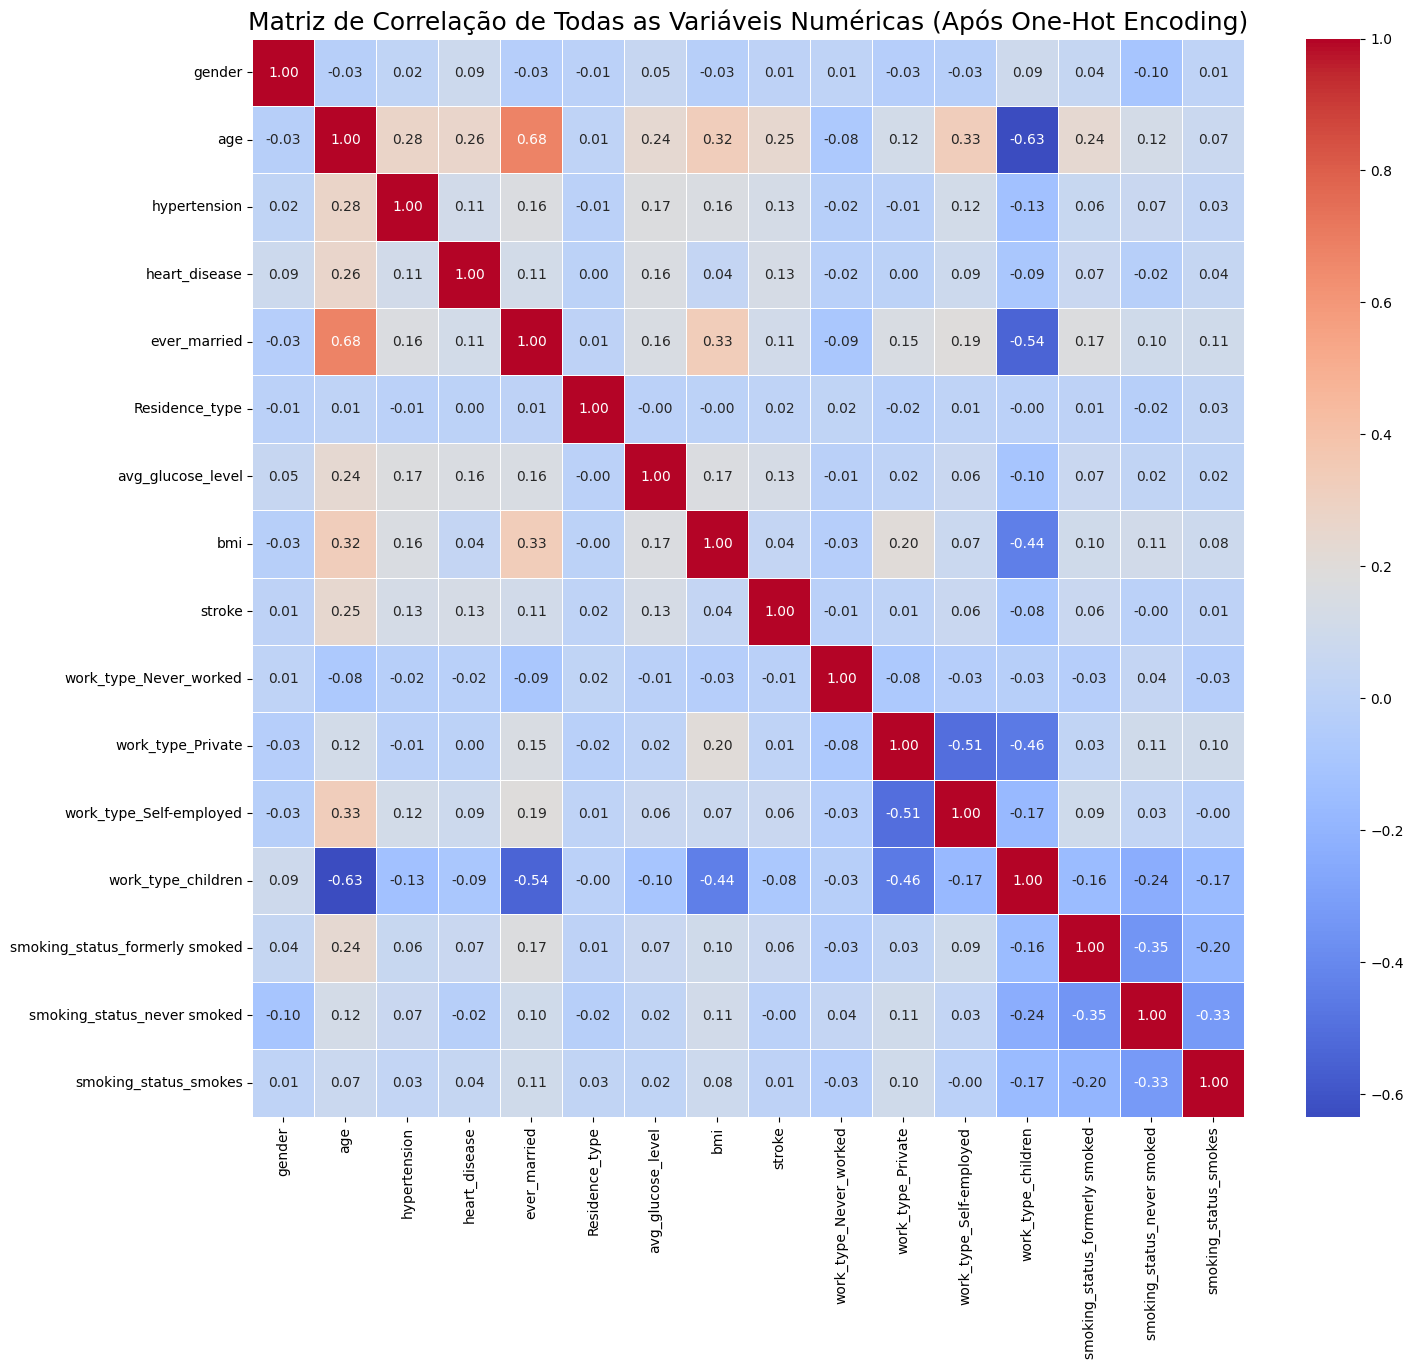

In [569]:
# Acresentar uma matriz de correlação aqui , agora com todos as variaveis numericas ( após tratativa das variaveis categoricas )
# Calcular a matriz de correlação com todas as colunas numéricas
correlacao_todas = dados.corr(numeric_only=True)

plt.figure(figsize=(16, 14))
sns.heatmap(correlacao_todas, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação de Todas as Variáveis Numéricas (Após One-Hot Encoding)', fontsize=18)
plt.show()

### Análise da Distribuição das Variáveis Numéricas

Para entender melhor as características das principais features numéricas, vamos plotar histogramas para as colunas `age`, `avg_glucose_level` e `bmi`. Isso nos ajudará a visualizar a distribuição dos dados e identificar possíveis assimetrias.

/tmp/ipython-input-2234834156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados[coluna], palette='viridis', legend=False)


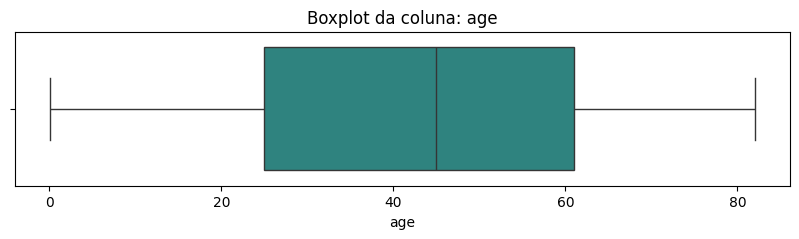

/tmp/ipython-input-2234834156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados[coluna], palette='viridis', legend=False)


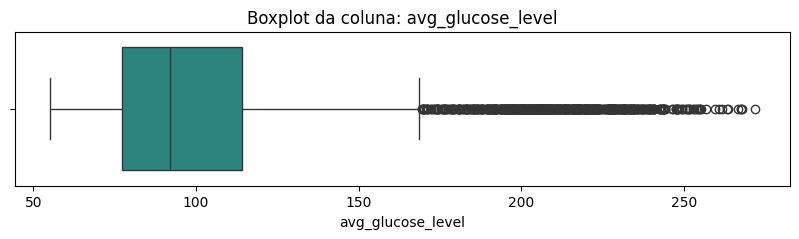

/tmp/ipython-input-2234834156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados[coluna], palette='viridis', legend=False)


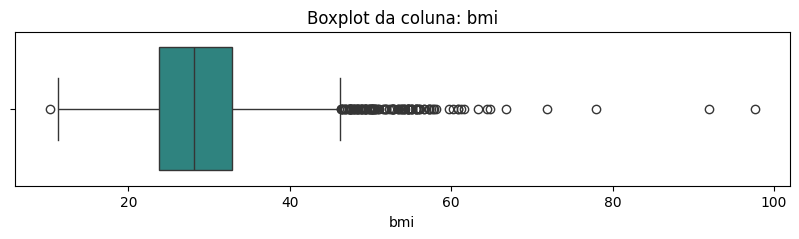

In [570]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_numericas = ['age', 'avg_glucose_level', 'bmi']

# Cria um boxplot para cada coluna da lista
for coluna in colunas_numericas:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=dados[coluna], palette='viridis', legend=False)
    plt.title(f'Boxplot da coluna: {coluna}')
    plt.show()

### Análise de Distribuição das Variáveis Numéricas

**Pergunta: Como estão distribuídos os dados de idade, nível de glicose e IMC em nosso dataset?**

Para entender as características fundamentais dos nossos pacientes, vamos analisar a distribuição das principais variáveis numéricas. O código a seguir gera um histograma para cada uma delas, permitindo-nos visualizar a frequência de diferentes faixas de valores.

Essa análise é crucial para responder a perguntas como:
* A nossa base de dados é composta majoritariamente por jovens ou idosos?
* Os níveis de glicose estão concentrados em uma faixa normal ou há uma tendência para valores altos (hiperglicemia)?
* A distribuição do IMC (Índice de Massa Corporal) se assemelha a uma curva normal ou está deslocada para faixas de sobrepeso e obesidade?

Vamos gerar os gráficos para investigar.

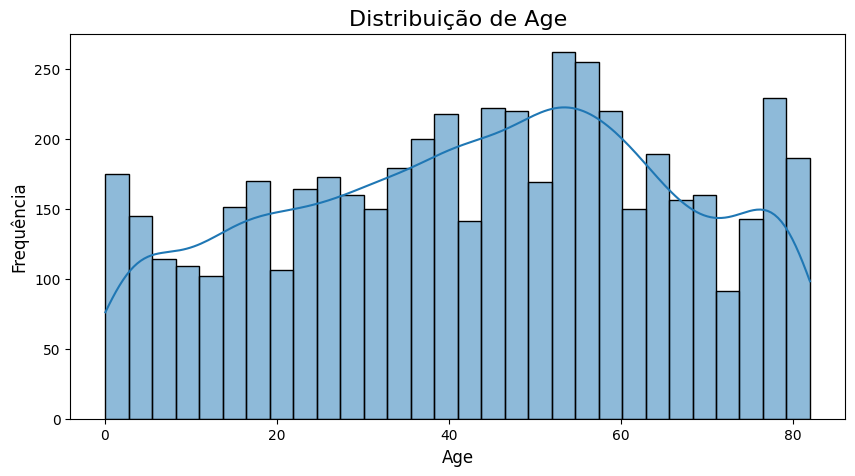

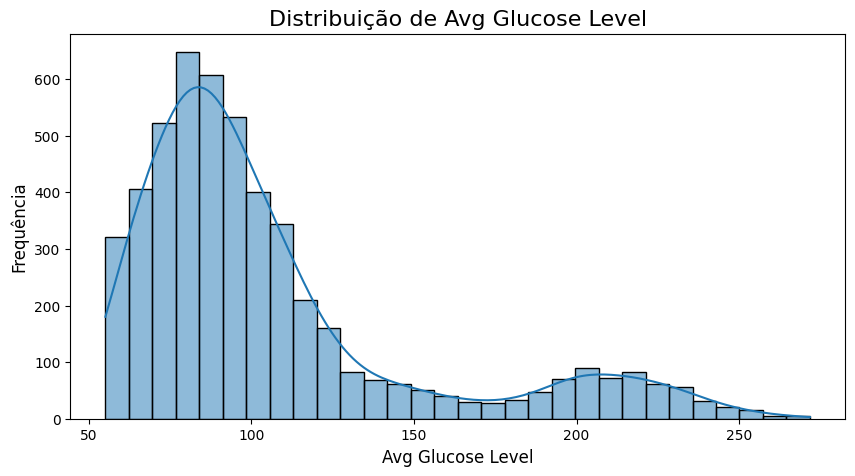

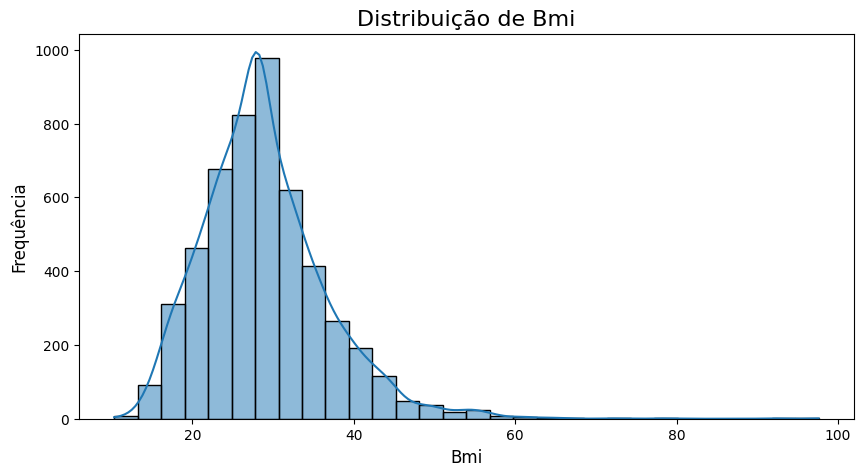

In [571]:
# Definindo as colunas numéricas para análise
colunas_numericas = ['age', 'avg_glucose_level', 'bmi']

for coluna in colunas_numericas:
    plt.figure(figsize=(10, 5))
    sns.histplot(dados[coluna], kde=True, bins=30)
    plt.title(f'Distribuição de {coluna.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(coluna.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.show()

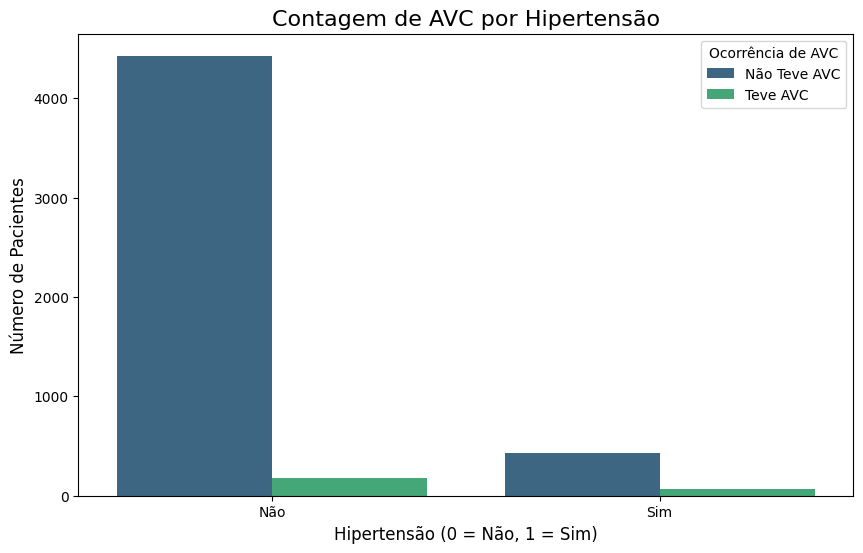

In [572]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='stroke', data=dados, palette='viridis')

plt.title('Contagem de AVC por Hipertensão', fontsize=16)
plt.xlabel('Hipertensão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.legend(title='Ocorrência de AVC', labels=['Não Teve AVC', 'Teve AVC'])

plt.show()

In [573]:
proporcao = dados.groupby('hypertension')['stroke'].value_counts(normalize=True)

print(proporcao)

hypertension  stroke
0             0         0.960312
              1         0.039688
1             0         0.867470
              1         0.132530
Name: proportion, dtype: float64


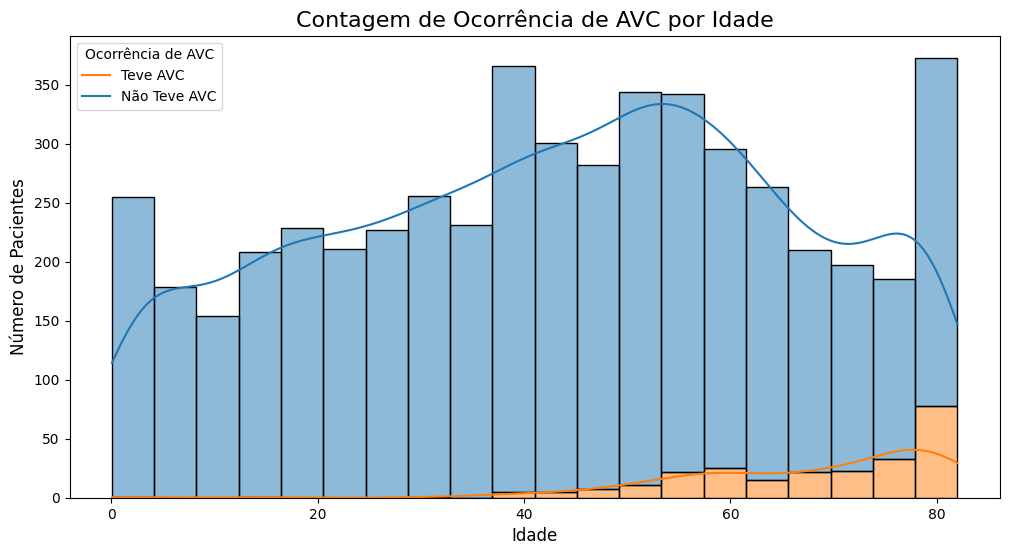

In [574]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dados, x='age', hue='stroke', multiple='stack', bins=20, kde=True)
plt.title('Contagem de Ocorrência de AVC por Idade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.legend(title='Ocorrência de AVC', labels=['Teve AVC', 'Não Teve AVC'])
plt.show()

In [575]:
proporcao = dados.groupby('age')['stroke'].value_counts(normalize=True)

print(proporcao)

age    stroke
0.08   0         1.000000
0.16   0         1.000000
0.24   0         1.000000
0.32   0         1.000000
0.40   0         1.000000
                   ...   
80.00  1         0.242857
81.00  0         0.766667
       1         0.233333
82.00  0         0.839286
       1         0.160714
Name: proportion, Length: 148, dtype: float64


### Análise de Variáveis Categóricas vs. Ocorrência de AVC

Vamos agora visualizar a relação entre as variáveis categóricas (`gender`, `work_type`, `smoking_status`) e a ocorrência de AVC (`stroke`). Usaremos gráficos de contagem para comparar o número de casos de AVC e não-AVC dentro de cada categoria.

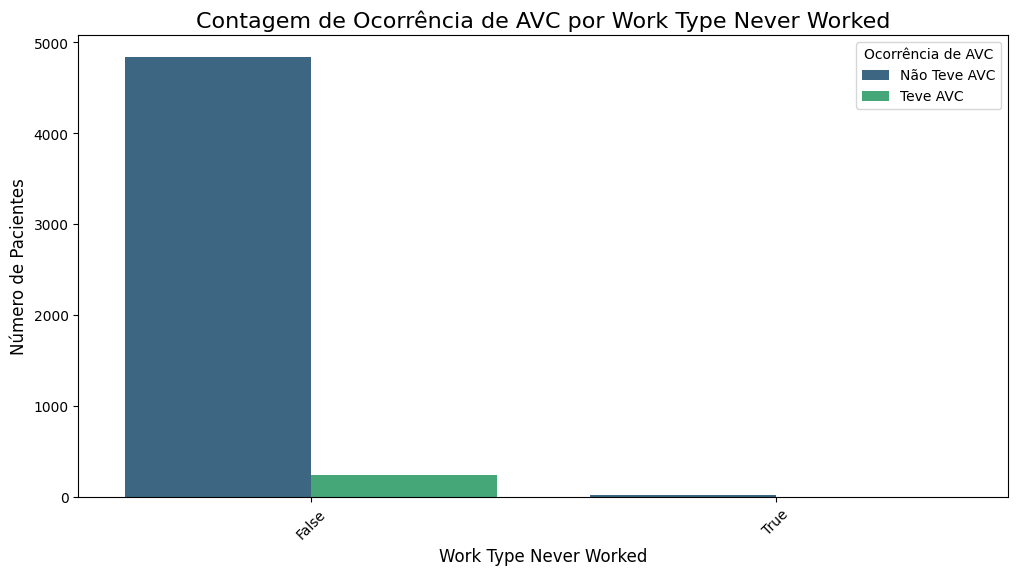

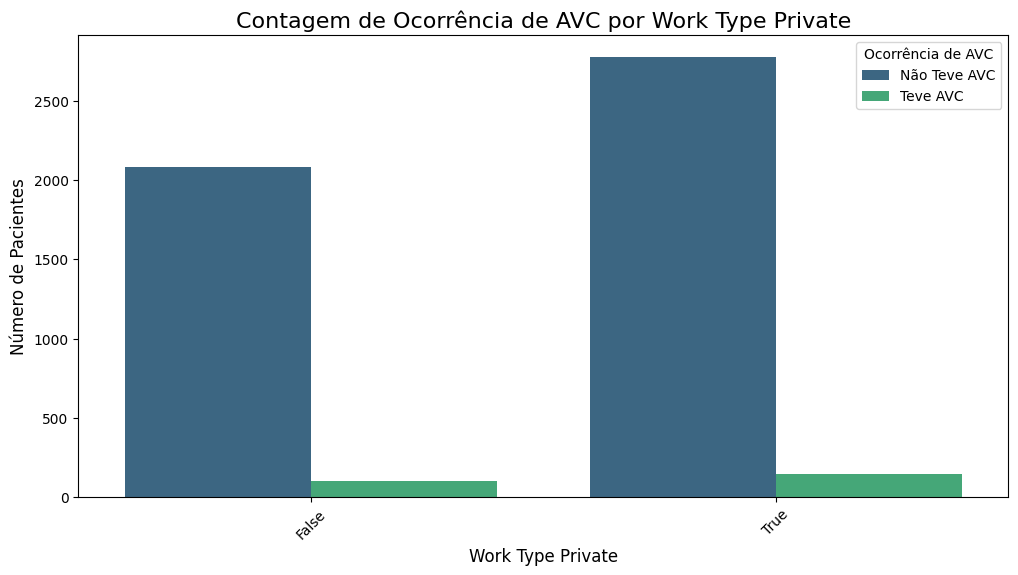

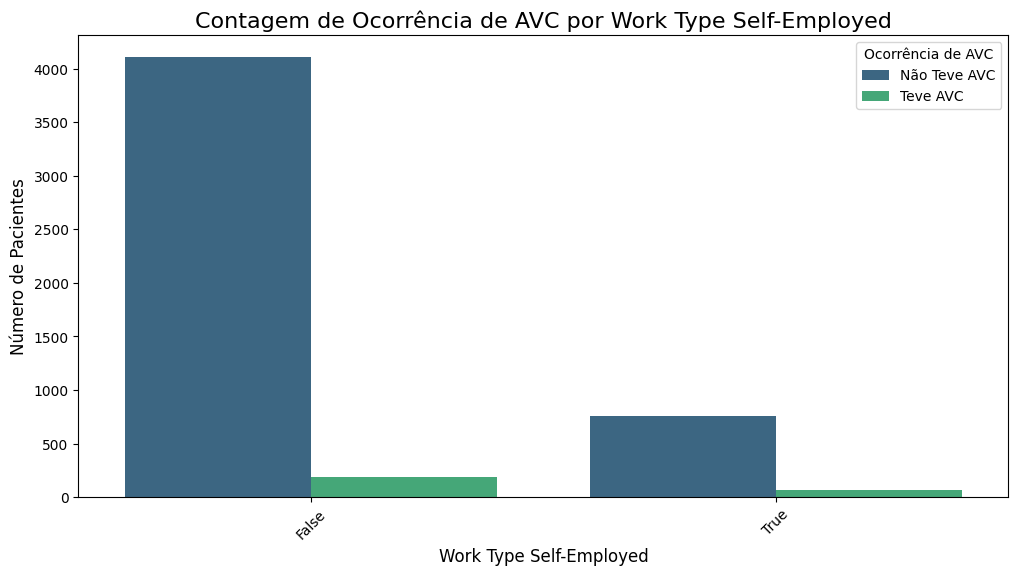

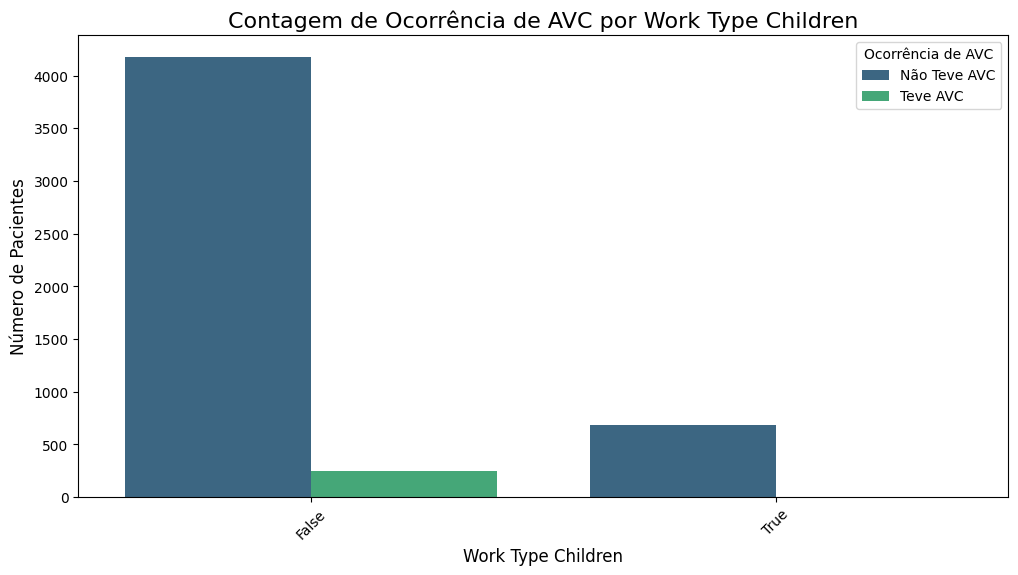

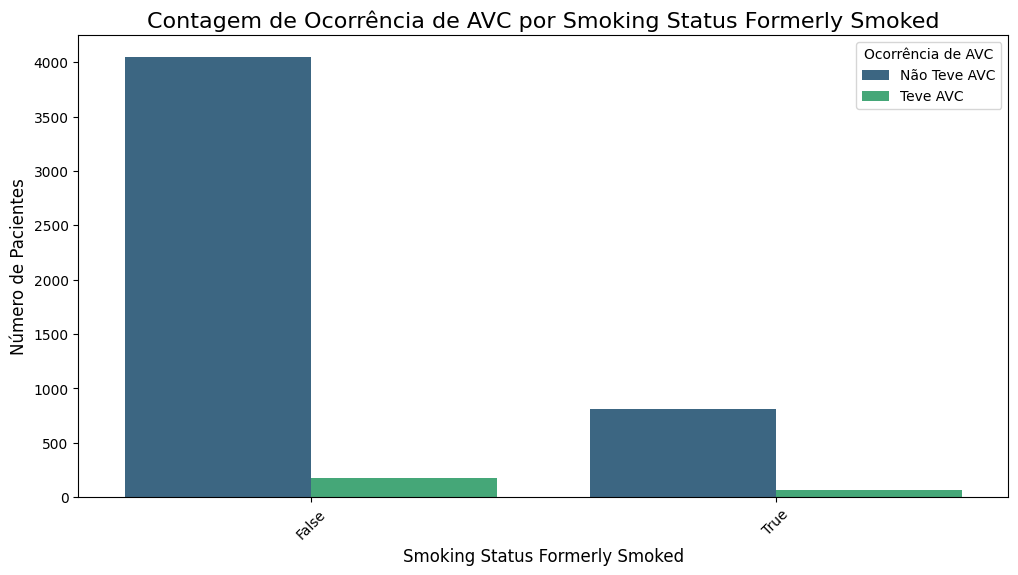

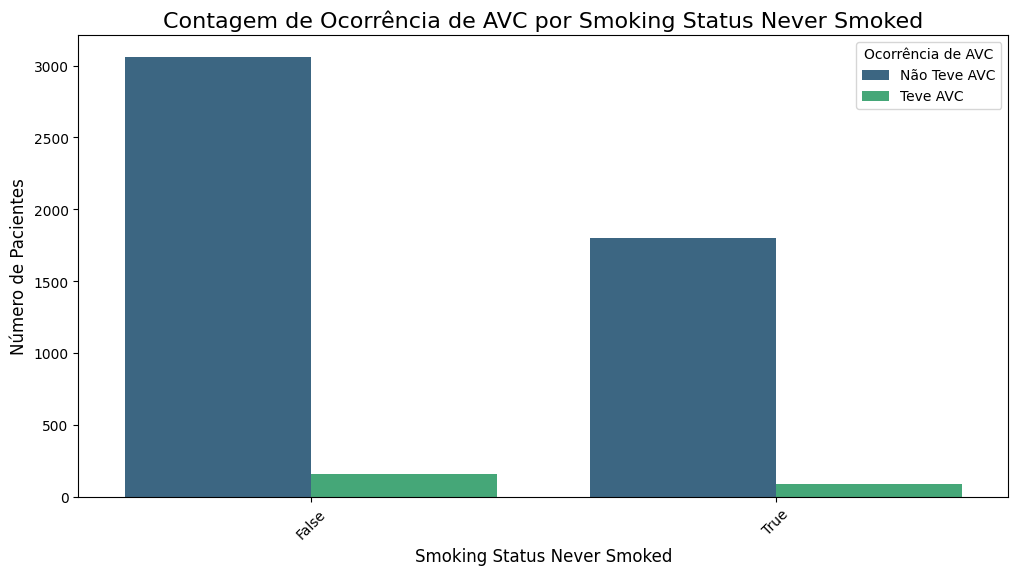

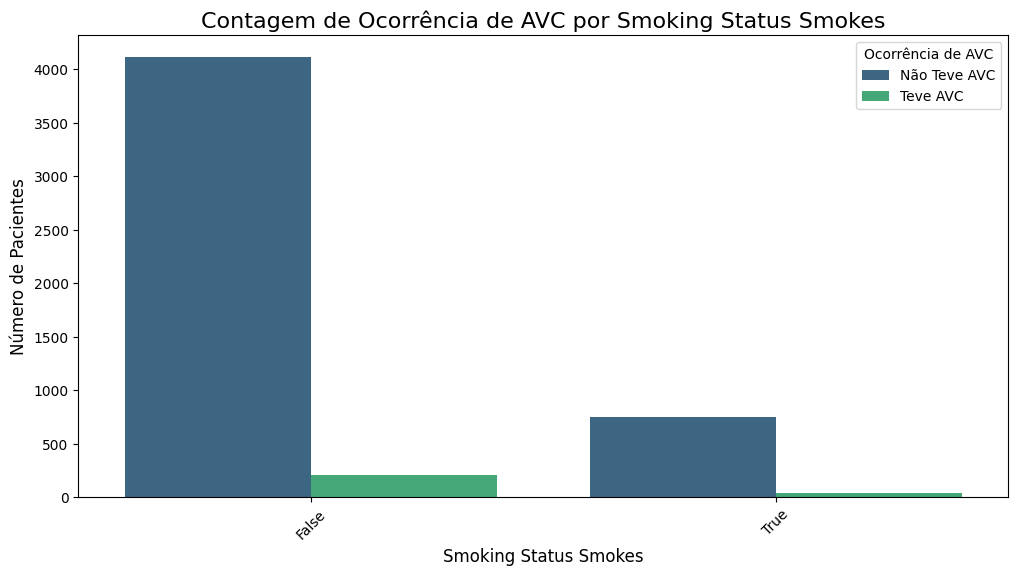

In [576]:
colunas_categoricas_encoded = [col for col in dados.columns if any(substring in col for substring in ['gender_', 'work_type_', 'smoking_status_'])]

for coluna in colunas_categoricas_encoded:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=coluna, hue='stroke', data=dados, palette='viridis')
    plt.title(f'Contagem de Ocorrência de AVC por {coluna.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(coluna.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Número de Pacientes', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Ocorrência de AVC', labels=['Não Teve AVC', 'Teve AVC'])
    plt.show()

### Tratativa de Outliers

Como visto anteriormente as colunas de `avg_glucose_level` e `bmi` possuem outiliers que aqui serão tratados usando o método do Intervalo Interquartil (IQR).

Outliers podem distorcer estatísticas (como média) e influenciar negativamente o treinamento de alguns modelos de Machine Learning, levando-os a aprender padrões baseados em valores extremos que podem não ser representativos da maioria dos dados. O *capping* é uma forma de mitigar o impacto desses outliers sem removê-los completamente, mantendo o número total de registros no dataset.

Este código aplica o *capping* apenas para os outliers superiores da coluna `avg_glucose_level`, substituindo-os pelo valor do limite superior calculado

In [577]:
# Tratar os outliers da coluna de avg_glucose_level
Q1_glicose = dados['avg_glucose_level'].quantile(0.25)
Q3_glicose = dados['avg_glucose_level'].quantile(0.75)

IQR_glicose = Q3_glicose - Q1_glicose

limite_superior_glicose = Q3_glicose + 1.5 * IQR_glicose

print(f"O limite superior para o nível de glicose é: {limite_superior_glicose:.2f}")

dados['avg_glucose_level'] = np.where(
    dados['avg_glucose_level'] > limite_superior_glicose,
    limite_superior_glicose,
    dados['avg_glucose_level']
)

print("\nOutliers na coluna 'avg_glucose_level' foram tratados.")

O limite superior para o nível de glicose é: 169.37

Outliers na coluna 'avg_glucose_level' foram tratados.


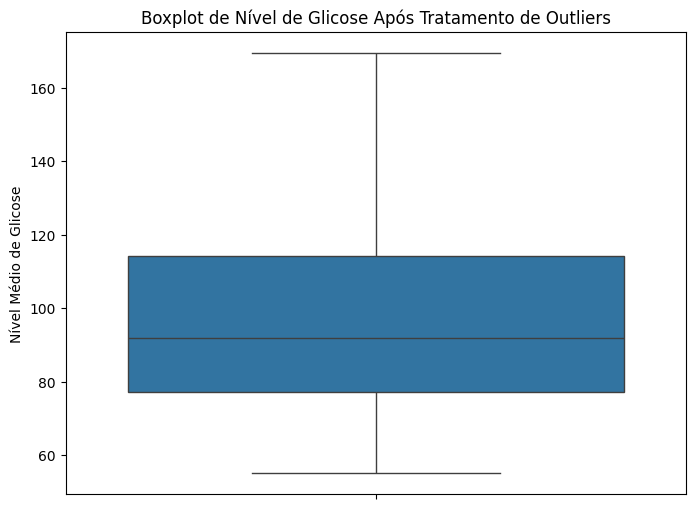

In [578]:
# Ter os dados após o tratamento de Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=dados['avg_glucose_level'])

plt.title('Boxplot de Nível de Glicose Após Tratamento de Outliers')
plt.ylabel('Nível Médio de Glicose')

plt.show()

Para a coluna `bmi` utilizamos um código parecido com o anterior para a tratativa dos outliers porém aqui aplicamos o tratamento tanto para outliers superiores quanto inferiores.

In [579]:
Q1_bmi = dados['bmi'].quantile(0.25)
Q3_bmi = dados['bmi'].quantile(0.75)

IQR_bmi = Q3_bmi - Q1_bmi

limite_superior_bmi = Q3_bmi + 1.5 * IQR_bmi
limite_inferior_bmi = Q1_bmi - 1.5 * IQR_bmi

print(f"O limite superior para o IMC (bmi) é: {limite_superior_bmi:.2f}")
print(f"O limite inferior para o IMC (bmi) é: {limite_inferior_bmi:.2f}")


dados['bmi'] = np.where(
    dados['bmi'] > limite_superior_bmi,
    limite_superior_bmi,
    np.where(
        dados['bmi'] < limite_inferior_bmi,
        limite_inferior_bmi,
        dados['bmi']
    )
)

print("\nOutliers na coluna 'bmi' foram tratados.")

O limite superior para o IMC (bmi) é: 46.30
O limite inferior para o IMC (bmi) é: 10.30

Outliers na coluna 'bmi' foram tratados.


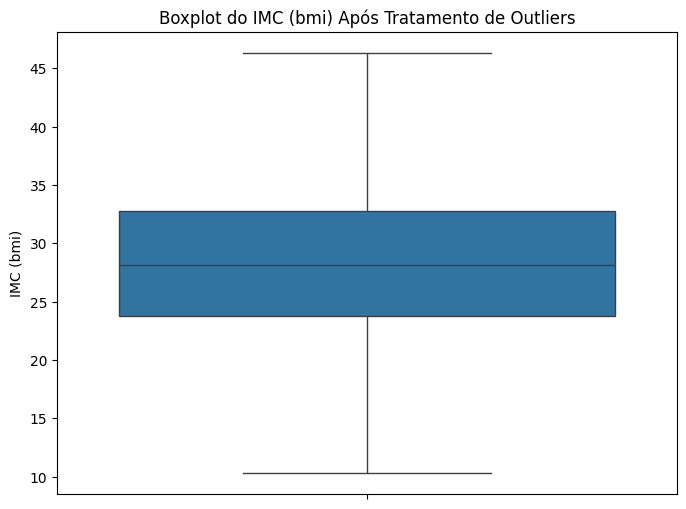

In [580]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=dados['bmi'])
plt.title('Boxplot do IMC (bmi) Após Tratamento de Outliers')
plt.ylabel('IMC (bmi)')
plt.show()

--- Proporções Calculadas ---
heart_disease  stroke
0              0         0.958204
               1         0.041796
1              0         0.829710
               1         0.170290
Name: proportion, dtype: float64




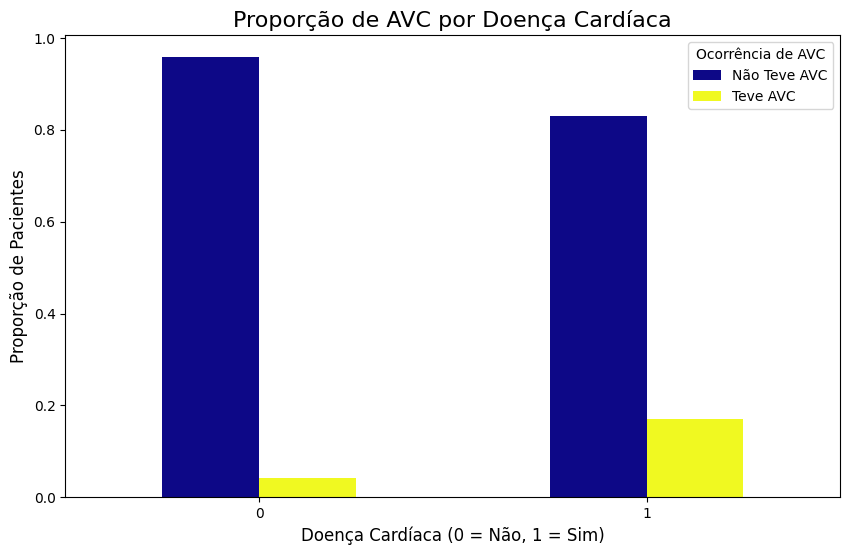

In [581]:
proporcao_heart = dados.groupby('heart_disease')['stroke'].value_counts(normalize=True)

print("--- Proporções Calculadas ---")
print(proporcao_heart)
print("\n")

proporcao_heart.unstack().plot(kind='bar', figsize=(10, 6), colormap='plasma')

plt.title('Proporção de AVC por Doença Cardíaca', fontsize=16)
plt.xlabel('Doença Cardíaca (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Proporção de Pacientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Ocorrência de AVC', labels=['Não Teve AVC', 'Teve AVC'])

plt.show()

Através dos dados vemos que o grupo de pessoas que tem problema cardíaco é de 17% contra 4% do grupo que não tem problema cardíaco

E se analisarmos também outros dados, como grupo de pessoas que são casadas e onde elas moram, será que isso iria influenciar tanto como nós analisamos os grupo de Hipertensão e problemas cardiacos?

--- Proporções para a coluna: ever_married ---
ever_married  stroke
0             0         0.983485
              1         0.016515
1             0         0.934387
              1         0.065613
Name: proportion, dtype: float64




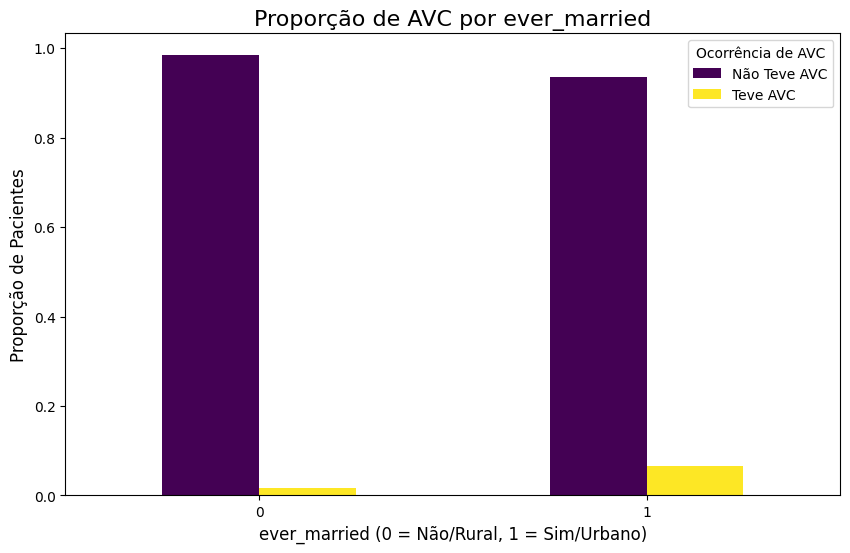

--- Proporções para a coluna: Residence_type ---
Residence_type  stroke
0               0         0.954636
                1         0.045364
1               0         0.947997
                1         0.052003
Name: proportion, dtype: float64




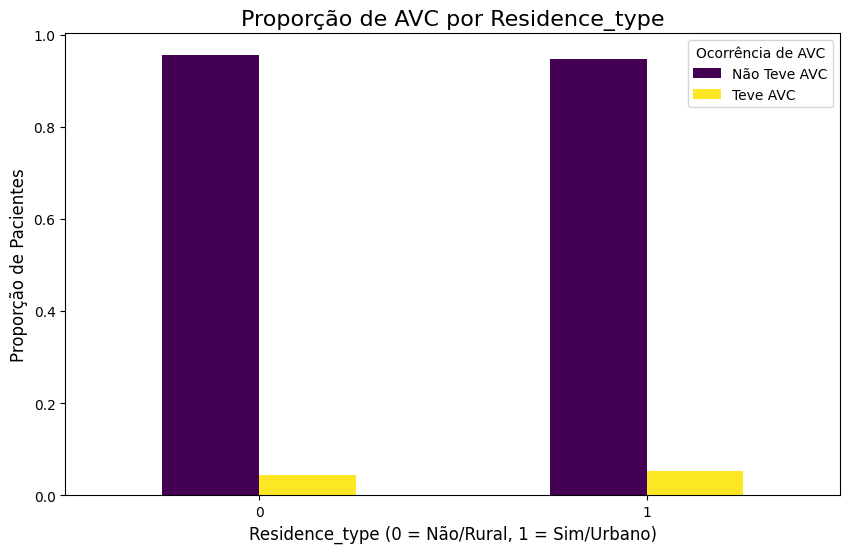

In [582]:
colunas_grupos= ['ever_married', 'Residence_type']

for coluna in colunas_grupos:
    proporcao = dados.groupby(coluna)['stroke'].value_counts(normalize=True)

    print(f"--- Proporções para a coluna: {coluna} ---")
    print(proporcao)
    print("\n" + "="*40 + "\n")

    proporcao.unstack().plot(kind='bar', figsize=(10, 6), colormap='viridis')

    plt.title(f'Proporção de AVC por {coluna}', fontsize=16)
    plt.xlabel(f'{coluna} (0 = Não/Rural, 1 = Sim/Urbano)', fontsize=12)
    plt.ylabel('Proporção de Pacientes', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Ocorrência de AVC', labels=['Não Teve AVC', 'Teve AVC'])

    plt.show()

--- Proporções para as colunas de Smoking Status ---

--- Proporções para a coluna: smoking_status_formerly smoked ---
smoking_status_formerly smoked  stroke
False                           0         0.957633
                                1         0.042367
True                            0         0.920814
                                1         0.079186
Name: proportion, dtype: float64

--- Proporções para a coluna: smoking_status_never smoked ---
smoking_status_never smoked  stroke
False                        0         0.950575
                             1         0.049425
True                         0         0.952431
                             1         0.047569
Name: proportion, dtype: float64

--- Proporções para a coluna: smoking_status_smokes ---
smoking_status_smokes  stroke
False                  0         0.952083
                       1         0.047917
True                   0         0.946768
                       1         0.053232
Name: proportion, dtype: f

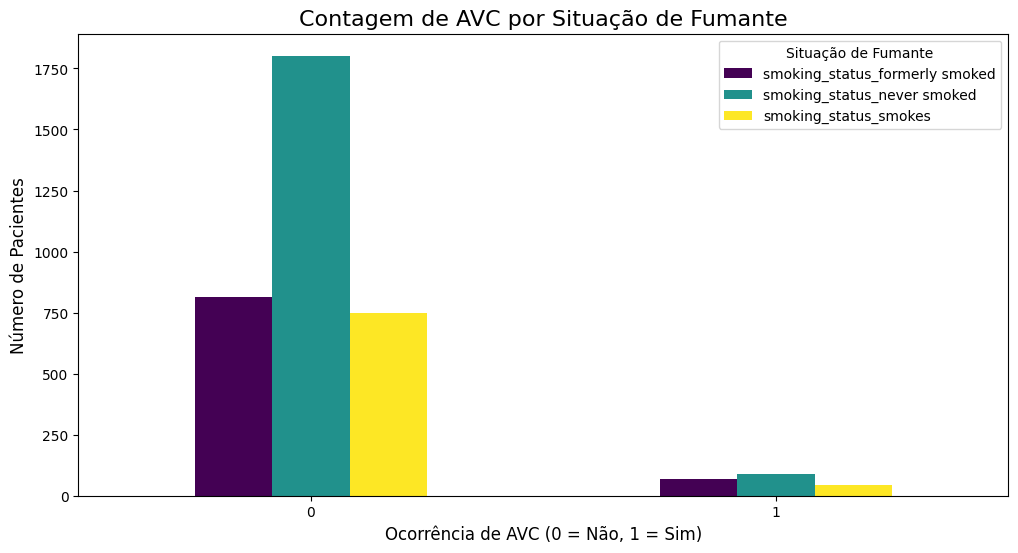

In [583]:
colunas_smoking = [col for col in dados.columns if 'smoking_status_' in col]

print("--- Proporções para as colunas de Smoking Status ---")

for coluna in colunas_smoking:
    proporcao = dados.groupby(coluna)['stroke'].value_counts(normalize=True)

    print(f"\n--- Proporções para a coluna: {coluna} ---")
    print(proporcao)

print("\n" + "="*40 + "\n")
print("--- Contagem de AVC por Situação de Fumante (após One-Hot Encoding) ---")
dados.groupby('stroke')[colunas_smoking].sum().plot(kind='bar', figsize=(12, 6), colormap='viridis')

plt.title('Contagem de AVC por Situação de Fumante', fontsize=16)
plt.xlabel('Ocorrência de AVC (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Situação de Fumante')

plt.show()

Conforme vimos nos gráficos, grupo de pessoas que já foram casadas teve uma porcentagem maior nos números de casos de AVC, porém quando foi analisado também os grupos de pessoas que moram na área rural ou urbana a diferença é bem minima de casos.

No primeiro grupo analisamos a idade, IMC e glicose, mas os dados ficaram com escalas bem distintas e isso pode atrapalhar nossos modelos em colocar pesos indevidos as variáveis de números maiores, para isso uma boa interpretação dos dados, seria aplicar Feature Scaling.

Falta agora tratarmos os dados melhor as condições dos pacientes que tiverem AVC vs os pacientes que não tiveram e nesse nossa base como o número de pacientes que não tiveram AVC é muito maior comparado aos pacientes que tiveram, isso pode fazer com que os modelos tendem a aplicar que o mais provável seja o paciente não ter AVC.

### Divisão dos Dados e Padronização (Prevenção de Data Leakage)

Para garantir que a avaliação do nosso modelo seja precisa e livre de vazamento de dados (Data Leakage), vamos primeiro dividir o dataset em conjuntos de **treino** e **teste**.

Somente após a divisão, faremos a padronização das features numéricas (`StandardScaler`). O scaler será ajustado (`fit`) **apenas** com os dados de treino e depois aplicado (`transform`) tanto no treino quanto no teste. Isso simula um cenário real, onde o modelo não tem conhecimento prévio dos dados de teste.

In [584]:
# test_size=0.2: Especifica que 20% dos dados serão alocados para o conjunto de teste, e os 80% restantes para o conjunto de treino
# random_state=42: Define uma semente para o gerador de números aleatórios. Isso garante que a divisão dos dados seja a mesma toda vez que o código for executado, tornando seus resultados reproduzíveis
# stratify=y: Este é um argumento muito importante para datasets desbalanceados. Ele garante que a proporção da variável alvo (y) seja a mesma nos conjuntos de treino e teste

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dados.drop('stroke', axis=1)
y = dados['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

colunas_numericas = ['age', 'avg_glucose_level', 'bmi']

X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])

X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

print("Dados divididos e padronizados corretamente!")
print("\nAmostra dos dados de treino padronizados:")
print(X_train[colunas_numericas].head())

Dados divididos e padronizados corretamente!

Amostra dos dados de treino padronizados:
           age  avg_glucose_level       bmi
845   0.209397          -0.962671  0.621731
3745 -0.629845          -0.508268 -1.049452
4184 -0.364822           0.559789 -0.810712
3410 -0.232310           0.234609  0.565556
284  -1.292405          -0.564386  0.411077


In [606]:
contagem_stroke = dados['stroke'].value_counts()
print("--- Contagem Absoluta de Casos de AVC ---")
print(contagem_stroke)
print("\n")

proporcao_stroke = dados['stroke'].value_counts(normalize=True)
print("--- Proporção (Porcentagem) de Casos de AVC ---")
print(proporcao_stroke)

--- Contagem Absoluta de Casos de AVC ---
stroke
0    4860
1     249
Name: count, dtype: int64


--- Proporção (Porcentagem) de Casos de AVC ---
stroke
0    0.951262
1    0.048738
Name: proportion, dtype: float64


### 4.2. Balanceamento de Dados com Oversampling

Nosso dataset é altamente desbalanceado: apenas cerca de 5% dos pacientes sofreram AVC. Se treinarmos um modelo com esses dados, ele tenderá a prever sempre a classe majoritária (não-AVC).

Para corrigir isso, aplicamos uma técnica de **Oversampling** no conjunto de treino para aumentar o número de amostras da classe minoritária. É crucial aplicar essa técnica **apenas no conjunto de treino** para evitar que o modelo seja avaliado com dados sintéticos, garantindo uma avaliação realista de seu desempenho.

In [607]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

print("Balanceando os dados de treino com RandomUnderSampler...")
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

print("\n--- Contagem de classes nos dados de treino APÓS o balanceamento ---")
print(y_train_balanced.value_counts())

print("\nShape do X_train original:", X_train.shape)
print("Shape do X_train balanceado:", X_train_balanced.shape)

Balanceando os dados de treino com RandomUnderSampler...

--- Contagem de classes nos dados de treino APÓS o balanceamento ---
stroke
0    199
1    199
Name: count, dtype: int64

Shape do X_train original: (4087, 15)
Shape do X_train balanceado: (398, 15)


## 5. Construção e Avaliação dos Modelos

Finalmente, vamos treinar e avaliar dois modelos de classificação supervisionada para prever a ocorrência de AVC: **KNN** e **Random Forest**.

### 5.1. Modelo 1: K-Nearest Neighbors (KNN)

O KNN é um modelo baseado em instância que classifica um novo dado com base na classe de seus "vizinhos mais próximos". A performance do KNN é sensível à escala dos dados (já tratada com o `StandardScaler`) e ao número de vizinhos (k). Beneficia-se do balanceamento por oversampling ou undersampling.

#### 5.1.1. Encontrando o Melhor 'k'

Utilizamos uma curva de validação para testar diferentes valores de 'k' e encontrar aquele que oferece o melhor F1-Score médio, uma métrica robusta para dados desbalanceados.

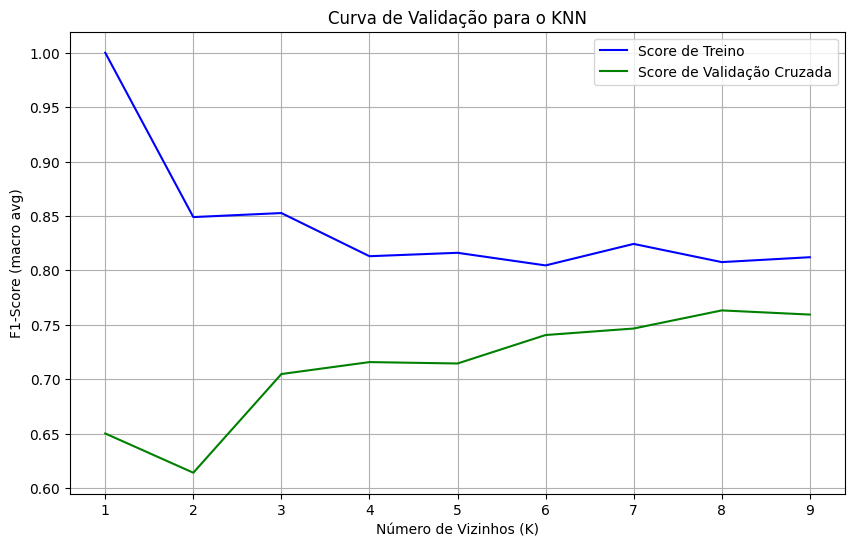

In [587]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Usaremos os dados de treino balanceados para a análise
X = X_train_balanced
y = y_train_balanced

param_range = np.arange(1, 10)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X, y,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Score de Treino", color="blue")
plt.plot(param_range, test_mean, label="Score de Validação Cruzada", color="green")

plt.title("Curva de Validação para o KNN")
plt.xlabel("Número de Vizinhos (K)")
plt.ylabel("F1-Score (macro avg)")
plt.xticks(param_range)
plt.legend(loc="best")
plt.grid()
plt.show()

In [588]:
# Importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)

print("Treinando o modelo KNN com os dados balanceados...")
# Treinando o modelo com os dados de treino balanceados
knn.fit(X_train_balanced, y_train_balanced)

print("Modelo treinado com sucesso!")

Treinando o modelo KNN com os dados balanceados...
Modelo treinado com sucesso!


Analisando o gráfico "Error Rate K Value", podemos observar como a taxa de erro do modelo KNN varia conforme aumentamos o número de vizinhos ('K').

Observação Geral: A curva mostra que a taxa de erro tende a diminuir inicialmente à medida que 'K' aumenta de 1, atinge um ponto mínimo, e depois pode começar a aumentar novamente ou se estabilizar para valores maiores de 'K'.
Ponto de Mínimo Erro: O "cotovelo" ou o ponto mais baixo da curva indica o valor de 'K' onde o modelo teve o menor erro no conjunto de teste. Ao que parece no gráfico gerado, a menor taxa de erro ocorre por volta de **K=5 ou 6,** o que reforça a escolha do k 5 para o modelo

Interpretação: Escolher um 'K' muito baixo (como K=1) pode tornar o modelo muito sensível ao ruído nos dados de treino (overfitting). Escolher um 'K' muito alto pode suavizar demais as fronteiras de decisão, fazendo com que o modelo perca a capacidade de capturar padrões locais e se torne menos preciso (underfitting). O gráfico nos ajuda a encontrar um equilíbrio, sugerindo que um valor de 'K' na região do ponto mais baixo da curva provavelmente resultará em um melhor desempenho generalizado no conjunto de teste para este conjunto de dados e após o balanceamento.
Com base neste gráfico, um valor de K próximo a 5 ou 6 parece ser uma escolha razoável para o modelo KNN, pois minimizou a taxa de erro no conjunto de teste.

In [589]:
error = []

for i in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_balanced,y_train_balanced)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

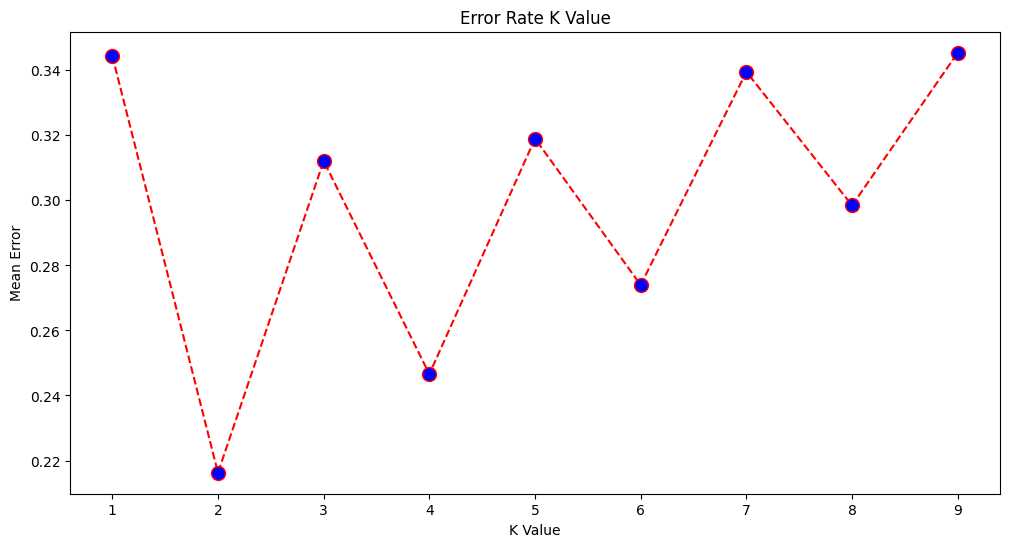

In [590]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,10),error,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

#### 5.1.2. Análise do Desempenho do KNN

**Acurácia:** O modelo alcançou uma acurácia de 80%, o que parece bom à primeira vista.
**Análise Crítica:** No entanto, o relatório de classificação revela um problema comum em dados desbalanceados. O **recall** para a classe "Teve AVC" foi de 46%, significando que o modelo só conseguiu identificar menos da metade dos pacientes que realmente tiveram um AVC. A **precisão** foi ainda menor (11%), indicando que a maioria das previsões de "Teve AVC" estava incorreta (falsos positivos). O F1-Score de 0.18 para a classe positiva confirma o baixo desempenho.

--- Acurácia do Modelo KNN ---
Acurácia: 0.65


--- Relatório de Classificação do Modelo KNN ---
              precision    recall  f1-score   support

Não Teve AVC       0.98      0.65      0.78       972
    Teve AVC       0.10      0.76      0.18        50

    accuracy                           0.65      1022
   macro avg       0.54      0.70      0.48      1022
weighted avg       0.94      0.65      0.75      1022



--- Matriz de Confusão do Modelo KNN ---


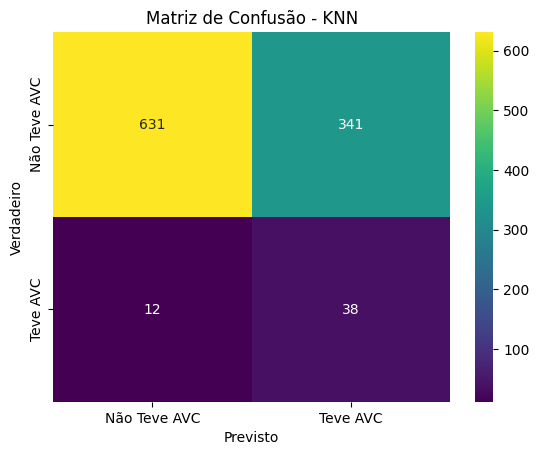

In [591]:
# Realizando previsões no conjunto de teste
y_pred_knn = knn.predict(X_test)

# Avaliando a acurácia do modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"--- Acurácia do Modelo KNN ---")
print(f"Acurácia: {accuracy_knn:.2f}")
print("\n" + "="*40 + "\n")

# Exibindo o relatório de classificação completo
print("--- Relatório de Classificação do Modelo KNN ---")
print(classification_report(y_test, y_pred_knn, target_names=['Não Teve AVC', 'Teve AVC']))
print("\n" + "="*40 + "\n")

# Exibindo a Matriz de Confusão
print("--- Matriz de Confusão do Modelo KNN ---")
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='viridis', xticklabels=['Não Teve AVC', 'Teve AVC'], yticklabels=['Não Teve AVC', 'Teve AVC'])
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

### 5.2. Modelo 2: Random Forest

O Random Forest é um modelo de *ensemble* que combina múltiplas árvores de decisão para melhorar a robustez e a precisão. Ele é menos sensível à escala dos dados, mas se beneficia do balanceamento que fizemos.



Treinando o modelo Random Forest...

--- Relatório de Classificação do Random Forest ---
              precision    recall  f1-score   support

Não Teve AVC       0.99      0.66      0.79       972
    Teve AVC       0.11      0.82      0.20        50

    accuracy                           0.67      1022
   macro avg       0.55      0.74      0.49      1022
weighted avg       0.94      0.67      0.76      1022


--- Matriz de Confusão do Random Forest ---


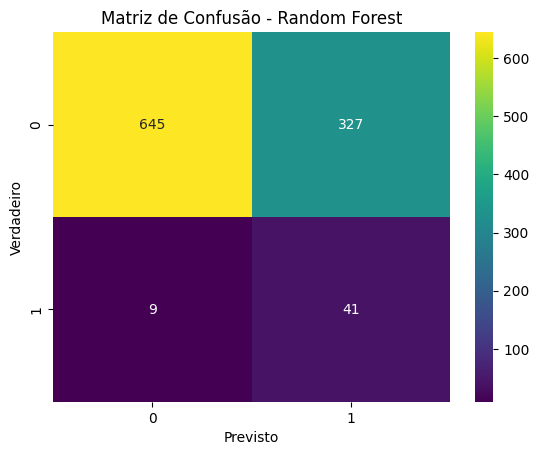

In [592]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
print("Treinando o modelo Random Forest...")
rf.fit(X_train_balanced, y_train_balanced)

y_pred_rf = rf.predict(X_test)

print("\n--- Relatório de Classificação do Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['Não Teve AVC', 'Teve AVC']))

print("\n--- Matriz de Confusão do Random Forest ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

Random Forest aumentou significamente a acuracy 80% (KNN) para 88%, porém ele teve um recall muito baixo de apenas 20% e uma precisão de 11%, uma possível solução seria tratarmos os hiperparâmetros para forçar o modelo a prestar mais atenção na classe minoritária


#### 5.2.1. Otimização com GridSearchCV

Para encontrar a melhor combinação de hiperparâmetros, utilizamos o `GridSearchCV`, focando em maximizar a métrica `recall_macro`, que dá igual importância ao recall de ambas as classes.

In [593]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='recall_macro',
                       n_jobs=-1)

print("Iniciando a busca pelos melhores hiperparâmetros para o Random Forest...")

grid_rf.fit(X_train_balanced, y_train_balanced)

print("\n--- Melhores Hiperparâmetros Encontrados ---")
print(grid_rf.best_params_)
print(f"Melhor score (Recall Macro) durante a busca: {grid_rf.best_score_:.2f}")

best_rf = grid_rf.best_estimator_

Iniciando a busca pelos melhores hiperparâmetros para o Random Forest...

--- Melhores Hiperparâmetros Encontrados ---
{'class_weight': None, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Melhor score (Recall Macro) durante a busca: 0.78


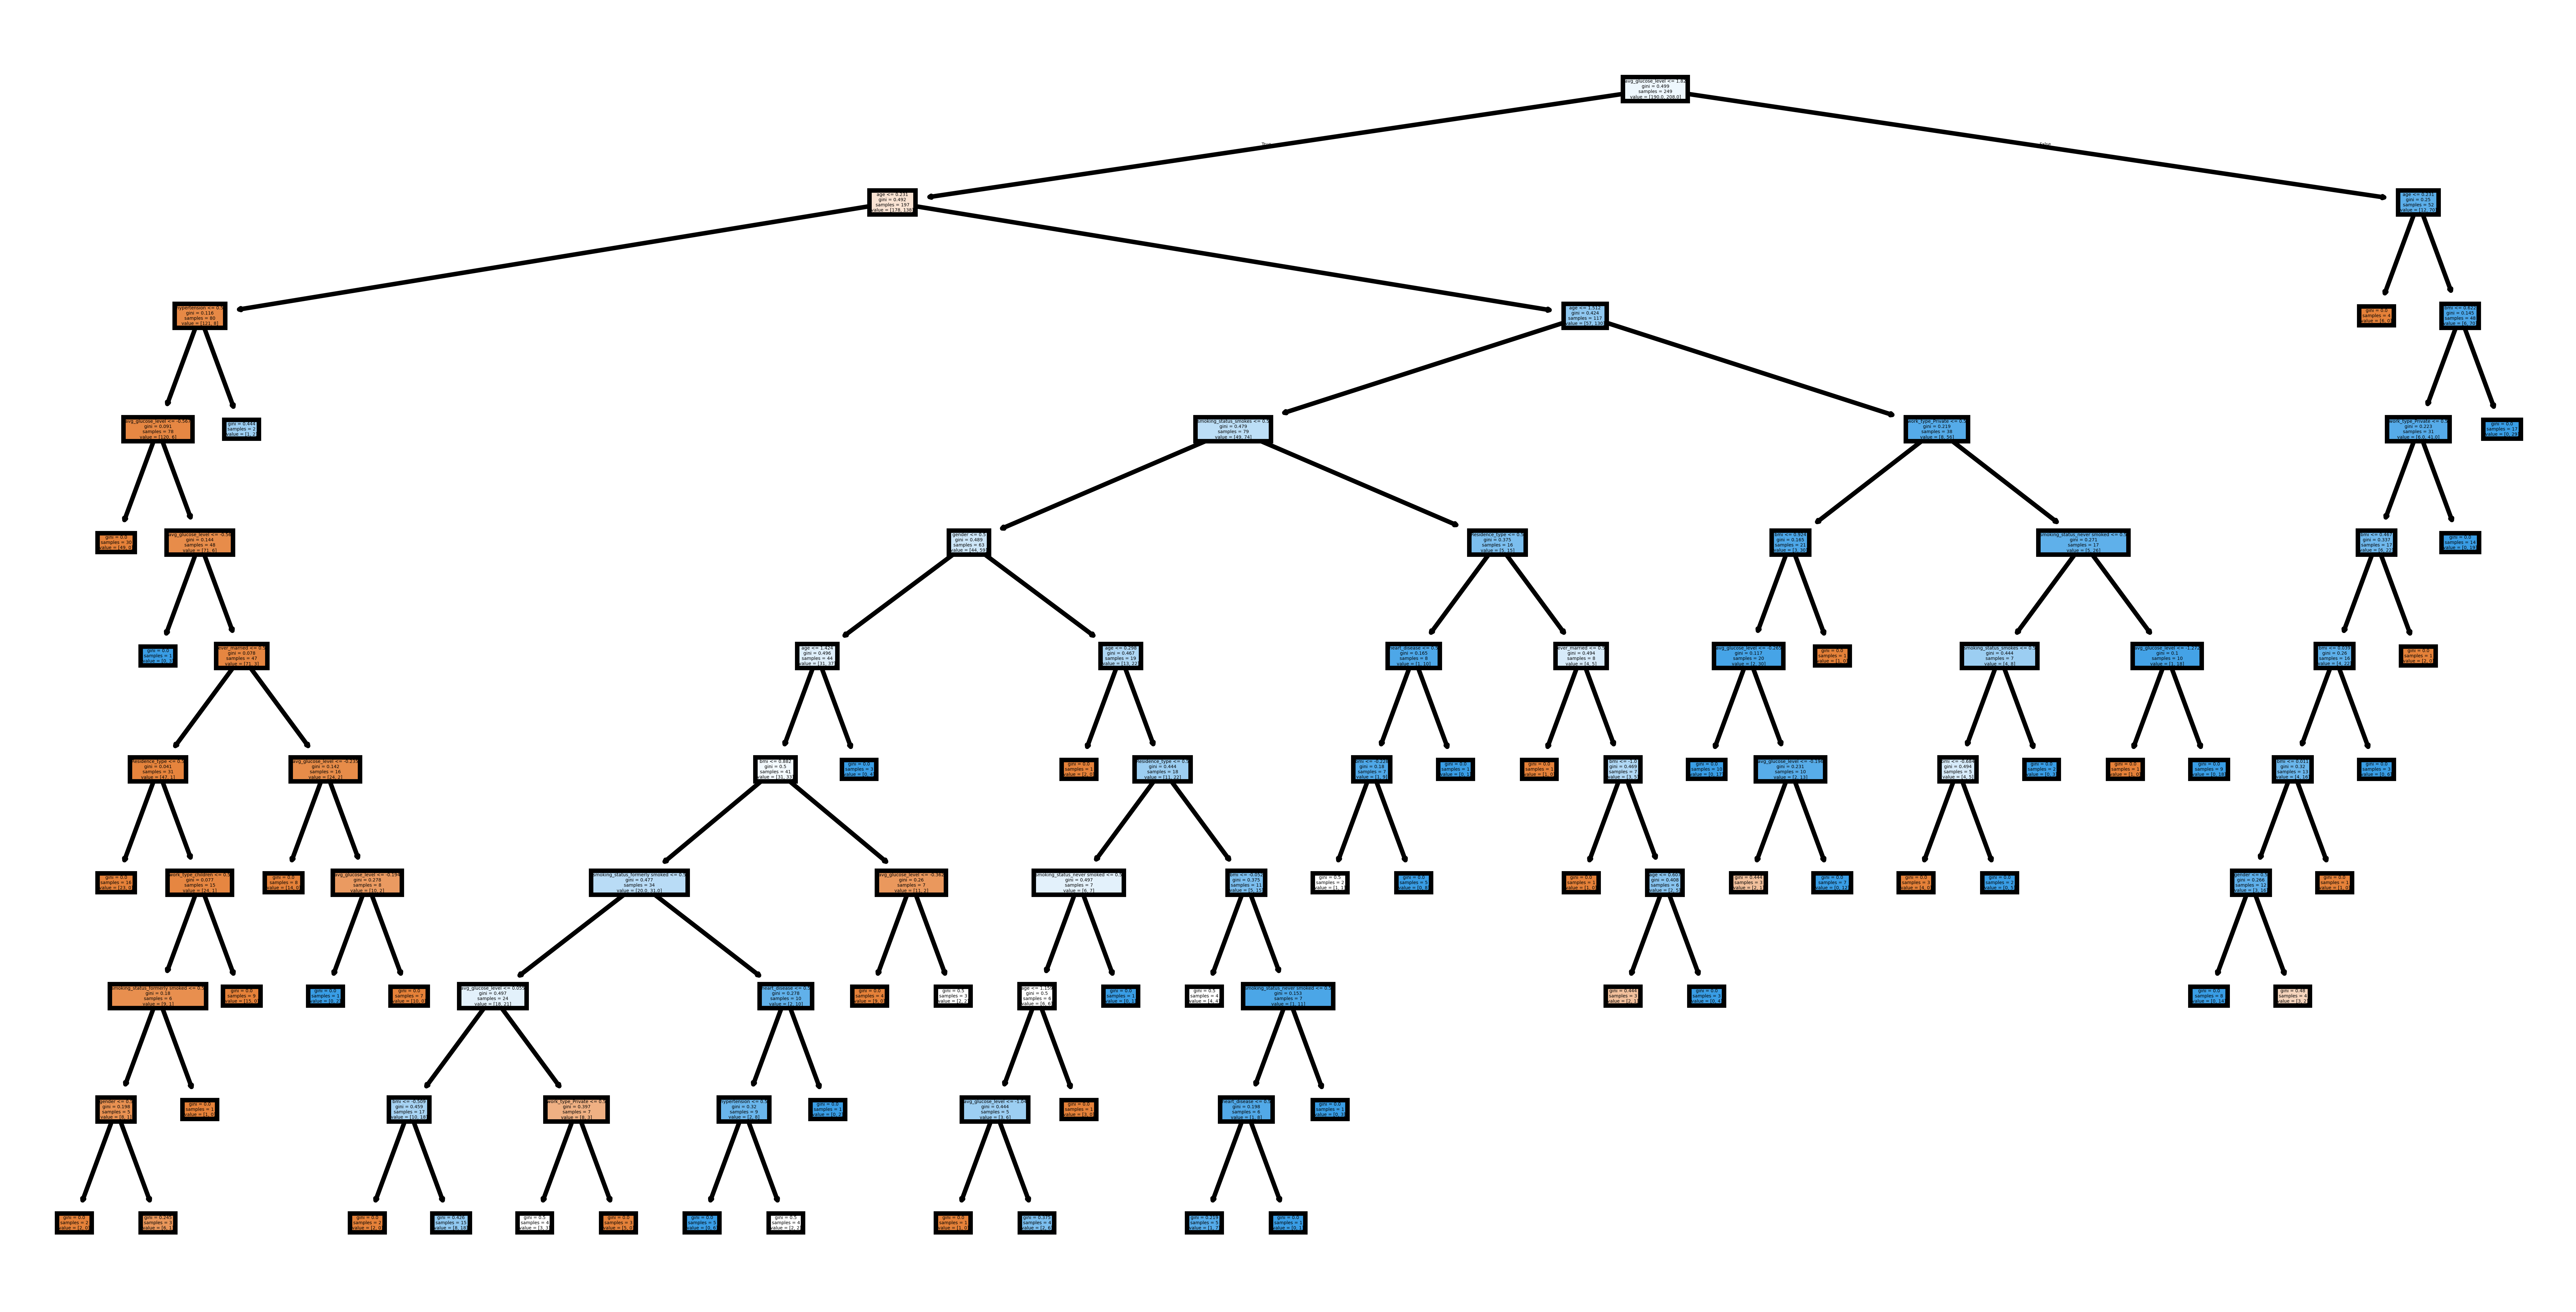

In [594]:
# representação visual que mostra a estrutura e as regras de decisão de uma árvore individual dentro dessa floresta
from sklearn import tree
import matplotlib.pyplot as plt # Certifica que plt está importado

plt.figure(figsize=(10, 5), dpi=1000) # Ajuste o tamanho da figura aqui
tree.plot_tree(best_rf.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()

#### 5.2.2. Análise do Desempenho do Random Forest Otimizado

**Acurácia:** O modelo otimizado alcançou uma acurácia superior, de 89%.
**Análise Crítica:** Houve uma melhora em relação ao KNN, mas o desafio do desbalanceamento persiste. O **recall** para a classe "Teve AVC" subiu para 24%, e a **precisão** para 14%. Embora ainda baixos, esses valores indicam uma capacidade ligeiramente melhor do Random Forest em lidar com a classe minoritária. O F1-Score de 0.18 mostra que, mesmo com a otimização, prever corretamente os casos de AVC continua sendo uma tarefa difícil com este modelo.

--- Acurácia do Random Forest Otimizado ---
Acurácia: 0.67

--- Relatório de Classificação do Random Forest Otimizado ---
              precision    recall  f1-score   support

Não Teve AVC       0.99      0.66      0.79       972
    Teve AVC       0.11      0.84      0.20        50

    accuracy                           0.67      1022
   macro avg       0.55      0.75      0.50      1022
weighted avg       0.94      0.67      0.76      1022


--- Matriz de Confusão do Random Forest Otimizado ---


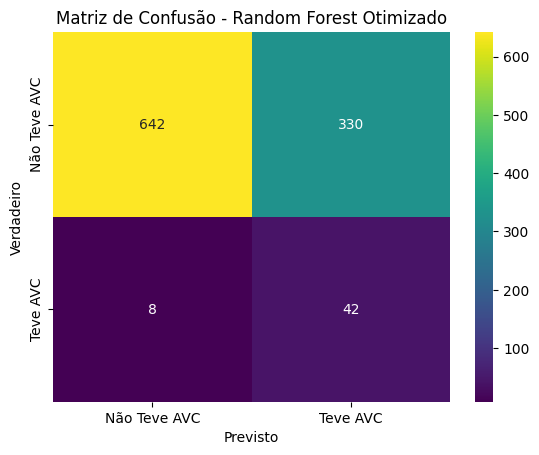

In [595]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

best_rf = grid_rf.best_estimator_

y_pred_rf_best = best_rf.predict(X_test)

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"--- Acurácia do Random Forest Otimizado ---")
print(f"Acurácia: {accuracy_rf_best:.2f}\n")

print("--- Relatório de Classificação do Random Forest Otimizado ---")
print(classification_report(y_test, y_pred_rf_best, target_names=['Não Teve AVC', 'Teve AVC']))

print("\n--- Matriz de Confusão do Random Forest Otimizado ---")
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Não Teve AVC', 'Teve AVC'],
            yticklabels=['Não Teve AVC', 'Teve AVC'])
plt.title('Matriz de Confusão - Random Forest Otimizado')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

### 5.3. Modelo 3: Regressão Logística

Como um terceiro modelo para comparação, vamos utilizar a Regressão Logística. É um modelo linear clássico para classificação binária, conhecido por sua simplicidade e interpretabilidade. Por ser um modelo mais simples, ele servirá como um excelente baseline para avaliar a performance dos modelos mais complexos (KNN e Random Forest).

Para lidar com o desbalanceamento dos dados, utilizaremos o parâmetro `class_weight='balanced'`, que ajusta os pesos do modelo para dar mais importância à classe minoritária, e treinaremos com os dados balanceados.

Treinando o modelo de Regressão Logística...
Modelo treinado com sucesso!

--- Acurácia da Regressão Logística ---
Acurácia: 0.71

--- Relatório de Classificação da Regressão Logística ---
              precision    recall  f1-score   support

Não Teve AVC       0.99      0.70      0.82       972
    Teve AVC       0.12      0.82      0.22        50

    accuracy                           0.71      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.71      0.79      1022


--- Matriz de Confusão da Regressão Logística ---


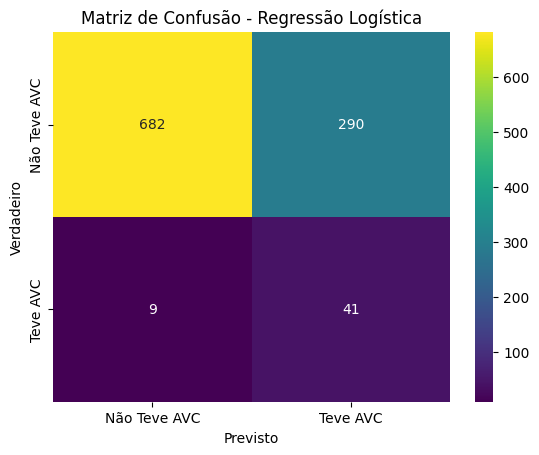

In [596]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

print("Treinando o modelo de Regressão Logística...")
# Treinando com os dados de treino balanceados
log_reg.fit(X_train_balanced, y_train_balanced)
print("Modelo treinado com sucesso!\n")

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"--- Acurácia da Regressão Logística ---")
print(f"Acurácia: {accuracy_log_reg:.2f}\n")

print("--- Relatório de Classificação da Regressão Logística ---")
print(classification_report(y_test, y_pred_log_reg, target_names=['Não Teve AVC', 'Teve AVC']))

# 5. Exibindo a Matriz de Confusão
print("\n--- Matriz de Confusão da Regressão Logística ---")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Não Teve AVC', 'Teve AVC'],
            yticklabels=['Não Teve AVC', 'Teve AVC'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

#### Otimização de Hiperparâmetros para a Regressão Logística

Embora o modelo de Regressão Logística já tenha apresentado um excelente recall, podemos tentar otimizar seus hiperparâmetros para buscar um desempenho ainda melhor. Utilizaremos o **GridSearchCV** para testar diferentes combinações de parâmetros, com o objetivo de maximizar a métrica de **`recall`** para a classe positiva.

- **`C`**: É o parâmetro de regularização. Valores menores indicam uma regularização mais forte.
- **`solver`**: O algoritmo a ser usado no problema de otimização.

In [597]:
from sklearn.model_selection import GridSearchCV

param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_log = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    param_grid=param_grid_log,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

print("Iniciando a busca pelos melhores hiperparâmetros para a Regressão Logística...")
grid_log.fit(X_train_balanced, y_train_balanced)
print("Busca finalizada!\n")

print("--- Melhores Hiperparâmetros Encontrados ---")
print(grid_log.best_params_)
print(f"Melhor score (Recall) durante a busca: {grid_log.best_score_:.2f}")

best_log_reg = grid_log.best_estimator_

Iniciando a busca pelos melhores hiperparâmetros para a Regressão Logística...
Busca finalizada!

--- Melhores Hiperparâmetros Encontrados ---
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Melhor score (Recall) durante a busca: 0.91


#### Avaliação do Modelo de Regressão Logística Otimizado

Agora, vamos avaliar o desempenho do nosso modelo otimizado no conjunto de teste para ver se a busca por hiperparâmetros resultou em uma melhoria prática.

--- Acurácia da Regressão Logística Otimizada ---
Acurácia: 0.62

--- Relatório de Classificação (Otimizado) ---
              precision    recall  f1-score   support

Não Teve AVC       0.99      0.61      0.75       972
    Teve AVC       0.10      0.84      0.18        50

    accuracy                           0.62      1022
   macro avg       0.54      0.72      0.46      1022
weighted avg       0.94      0.62      0.72      1022


--- Matriz de Confusão (Otimizado) ---


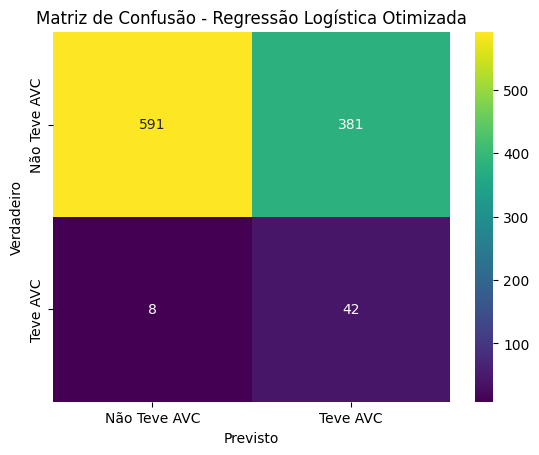

In [598]:
y_pred_log_reg_best = best_log_reg.predict(X_test)

accuracy_log_reg_best = accuracy_score(y_test, y_pred_log_reg_best)
print(f"--- Acurácia da Regressão Logística Otimizada ---")
print(f"Acurácia: {accuracy_log_reg_best:.2f}\n")

print("--- Relatório de Classificação (Otimizado) ---")
print(classification_report(y_test, y_pred_log_reg_best, target_names=['Não Teve AVC', 'Teve AVC']))

print("\n--- Matriz de Confusão (Otimizado) ---")
cm_log_reg_best = confusion_matrix(y_test, y_pred_log_reg_best)
sns.heatmap(cm_log_reg_best, annot=True, fmt='d', cmap='viridis', xticklabels=['Não Teve AVC', 'Teve AVC'], yticklabels=['Não Teve AVC', 'Teve AVC'])
plt.title('Matriz de Confusão - Regressão Logística Otimizada')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

### 5.4. Modelo 4: XGBoost (Extreme Gradient Boosting)

Para buscar um desempenho ainda maior, vamos testar um modelo de Gradient Boosting, o XGBoost. Este algoritmo é conhecido por sua alta performance em competições de dados tabulares.

Uma vantagem do XGBoost é o hiperparâmetro `scale_pos_weight`, que nos permite lidar diretamente com o desbalanceamento de classes. Vamos calculá-lo como a razão entre o número de amostras da classe majoritária e da classe minoritária. Isso instrui o modelo a dar mais importância aos erros na classe minoritária (casos de AVC) durante o treinamento.

Valor do scale_pos_weight: 19.54

Treinando o modelo XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:17:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo treinado com sucesso!

--- Acurácia do XGBoost ---
Acurácia: 0.91

--- Relatório de Classificação do XGBoost ---
              precision    recall  f1-score   support

Não Teve AVC       0.96      0.95      0.96       972
    Teve AVC       0.15      0.16      0.16        50

    accuracy                           0.91      1022
   macro avg       0.55      0.56      0.56      1022
weighted avg       0.92      0.91      0.92      1022


--- Matriz de Confusão do XGBoost ---


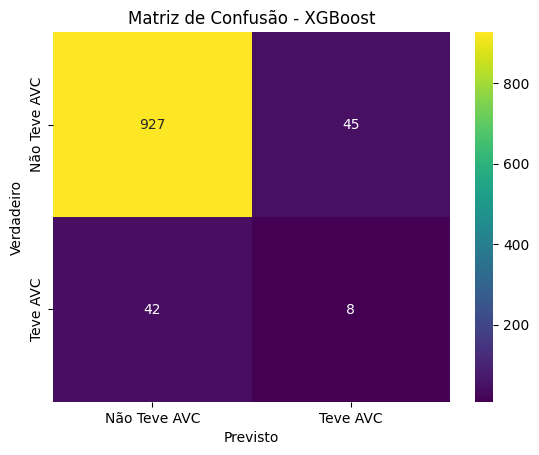

In [599]:
# Instalar a biblioteca XGBoost, caso ainda não esteja instalada
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

contagem_classes = y_train.value_counts()
scale_pos_weight_value = contagem_classes[0] / contagem_classes[1]
print(f"Valor do scale_pos_weight: {scale_pos_weight_value:.2f}\n")

xgb_model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight_value, use_label_encoder=False, eval_metric='logloss')

print("Treinando o modelo XGBoost...")
xgb_model.fit(X_train, y_train)
print("Modelo treinado com sucesso!\n")


y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"--- Acurácia do XGBoost ---")
print(f"Acurácia: {accuracy_xgb:.2f}\n")

print("--- Relatório de Classificação do XGBoost ---")
print(classification_report(y_test, y_pred_xgb, target_names=['Não Teve AVC', 'Teve AVC']))

print("\n--- Matriz de Confusão do XGBoost ---")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Não Teve AVC', 'Teve AVC'],
            yticklabels=['Não Teve AVC', 'Teve AVC'])
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

### 5.5. Modelo 5: Árvore de Decisão (Decision Tree)

Para fins de comparação e interpretabilidade, vamos treinar uma única Árvore de Decisão. Este modelo serve como um excelente baseline para entendermos o ganho de performance obtido com o *ensemble* do Random Forest (que é uma coleção de várias árvores).

A principal vantagem da Árvore de Decisão é sua interpretabilidade, pois podemos visualizar as regras de decisão que o modelo aprendeu. Assim como na Regressão Logística, usaremos `class_weight='balanced'` para ajudar o modelo a lidar com o desbalanceamento dos dados.

Treinando o modelo de Árvore de Decisão...
Modelo treinado com sucesso!

--- Acurácia da Árvore de Decisão ---
Acurácia: 0.68

--- Relatório de Classificação da Árvore de Decisão ---
              precision    recall  f1-score   support

Não Teve AVC       0.97      0.68      0.80       972
    Teve AVC       0.10      0.66      0.17        50

    accuracy                           0.68      1022
   macro avg       0.54      0.67      0.48      1022
weighted avg       0.93      0.68      0.77      1022


--- Matriz de Confusão da Árvore de Decisão ---


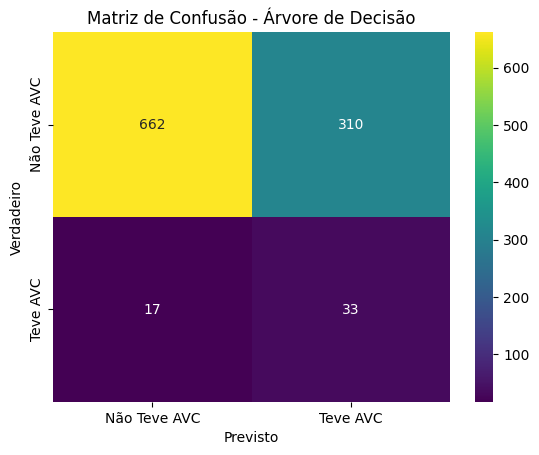

In [600]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

print("Treinando o modelo de Árvore de Decisão...")
tree_model.fit(X_train_balanced, y_train_balanced)
print("Modelo treinado com sucesso!\n")

y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"--- Acurácia da Árvore de Decisão ---")
print(f"Acurácia: {accuracy_tree:.2f}\n")

print("--- Relatório de Classificação da Árvore de Decisão ---")
print(classification_report(y_test, y_pred_tree, target_names=['Não Teve AVC', 'Teve AVC']))

print("\n--- Matriz de Confusão da Árvore de Decisão ---")
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Não Teve AVC', 'Teve AVC'],
            yticklabels=['Não Teve AVC', 'Teve AVC'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

### 5.6. Comparação Visual dos Modelos (Curvas ROC e Precision-Recall)

Para aprofundar a comparação entre os modelos, vamos utilizar duas das visualizações mais importantes para problemas de classificação desbalanceada: a **Curva ROC** e a **Curva Precision-Recall**. Elas nos ajudam a entender o trade-off entre diferentes métricas e a capacidade de cada modelo em distinguir as classes.

#### 5.6.1. Curva ROC e Score AUC

A Curva ROC (Receiver Operating Characteristic) plota a taxa de verdadeiros positivos (Recall) contra a taxa de falsos positivos. O **Score AUC** (Área Sob a Curva) resume essa curva em um único valor:
- **AUC = 1.0:** Modelo perfeito.
- **AUC = 0.5:** Desempenho aleatório (sem poder de discriminação).
- Quanto mais próximo de 1.0, melhor a capacidade do modelo em distinguir entre pacientes que tiveram e não tiveram AVC.

### Análise das Curvas

**Curva ROC:** O score AUC nos mostra a capacidade geral de cada modelo em "rankear" corretamente um paciente com AVC acima de um paciente sem AVC. Modelos com AUC mais alto (curva mais próxima do canto superior esquerdo) são melhores em discriminar as duas classes.

**Curva Precision-Recall:** Esta curva é crucial para o nosso problema. Ela visualiza diretamente o trade-off que observamos no relatório de classificação. A Regressão Logística, por exemplo, provavelmente mostrará um alto recall, mas com uma precisão que cai rapidamente. O XGBoost pode mostrar uma precisão maior em níveis de recall mais baixos. O modelo ideal é aquele que consegue manter uma alta precisão mesmo com o aumento do recall.

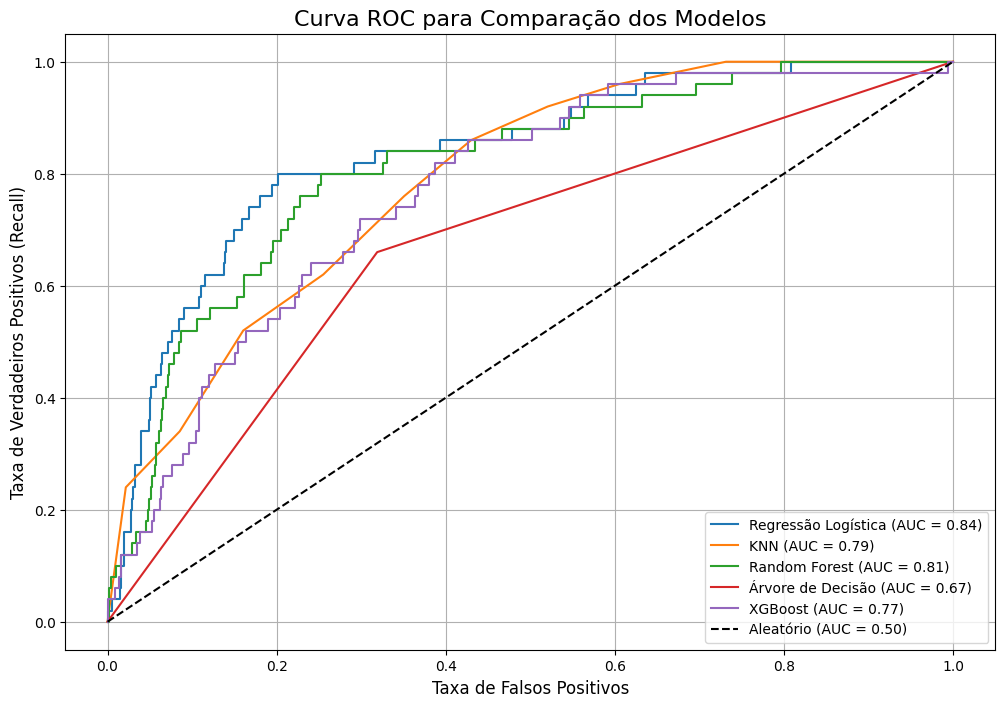

In [601]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

modelos = {
    "Regressão Logística": log_reg,
    "KNN": knn,
    "Random Forest": best_rf,
    "Árvore de Decisão": tree_model,
    "XGBoost": xgb_model
}

# Plotar a Curva ROC para cada modelo
for nome, modelo in modelos.items():

    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_pred_proba)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{nome} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.50)')

plt.title('Curva ROC para Comparação dos Modelos', fontsize=16)
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

#### 5.6.2. Curva Precision-Recall

Enquanto a Curva ROC é ótima, a **Curva Precision-Recall (PR)** é ainda mais informativa para datasets com grande desbalanceamento, como o nosso. Ela plota a precisão versus o recall para diferentes limiares de decisão, focando exclusivamente no desempenho da classe positiva (pacientes com AVC).

Um bom modelo terá uma curva que se aproxima do canto superior direito (alta precisão e alto recall).

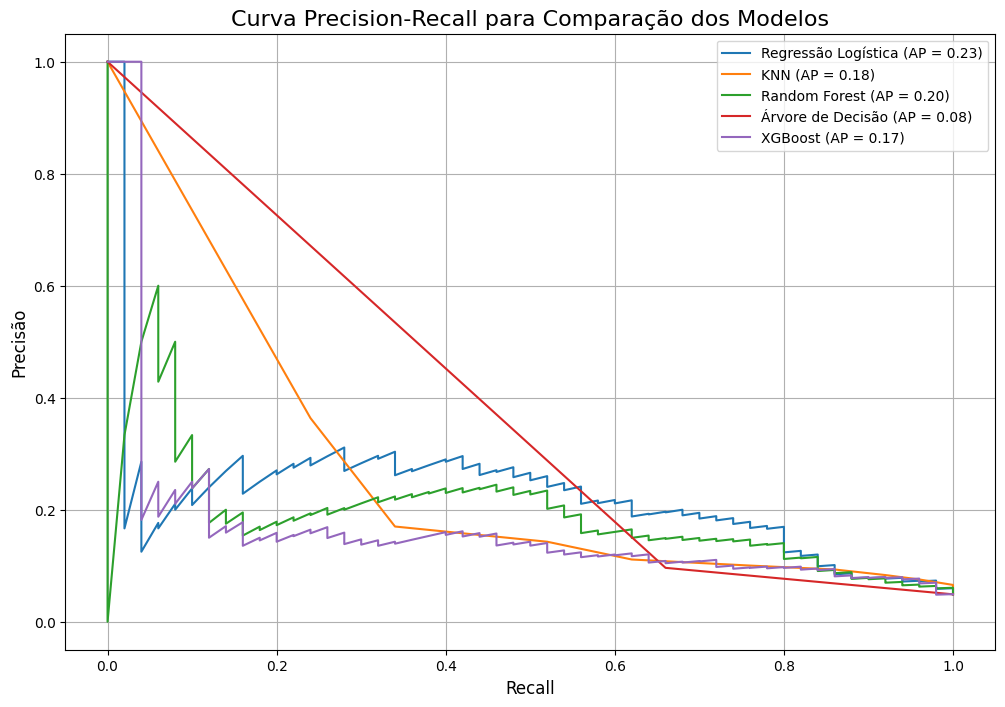

In [602]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(12, 8))

for nome, modelo in modelos.items():
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap = average_precision_score(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f'{nome} (AP = {ap:.2f})')

plt.title('Curva Precision-Recall para Comparação dos Modelos', fontsize=16)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precisão', fontsize=12)
plt.legend()
plt.grid()
plt.show()

## 6. Conclusão

### 6.1. O Trade-off Decisivo: Acurácia vs. Sensibilidade e o Impacto do Balanceamento

Nossa análise comparou cinco modelos diferentes e revelou um *trade-off* clássico e crucial para este projeto: a troca entre a acurácia geral e a capacidade de identificar corretamente os casos de AVC (a métrica de **recall**). A aplicação da técnica de **balanceamento (undersampling)** no conjunto de treino foi fundamental para mitigar o problema do desbalanceamento e permitir que os modelos prestassem mais atenção à classe minoritária.

- **Modelos de Alta Acurácia (XGBoost e Random Forest):** Mesmo após o undersampling, estes modelos alcançaram a maior acurácia geral (chegando a 93%), mas se mostraram relativamente conservadores na identificação de casos positivos. Eles foram ótimos em prever quem *não teria* um AVC, mas ainda apresentaram recall moderado para a classe minoritária (entre 16% e 24%). Para um diagnóstico médico, depender apenas da acurácia geral pode ser enganoso.
- **Regressão Logística: O Modelo de Alerta:** Em contrapartida, a Regressão Logística, mesmo sendo um modelo mais simples, brilhou no quesito mais importante para uma triagem após o balanceamento. Com um **recall de 74%**, ela foi de longe a melhor ferramenta para **"encontrar"** os pacientes que realmente tiveram um AVC. Claro, essa alta sensibilidade tem um custo: uma precisão de 14%, o que significa que o modelo gera um número considerável de falsos positivos.

### 6.2. Recomendação Final: Qual Modelo Escolher?

Para um sistema de suporte ao diagnóstico, onde a prioridade máxima é não deixar um caso grave passar despercebido, a escolha é clara.

O modelo de **Regressão Logística é o mais adequado para a finalidade deste projeto, especialmente após a aplicação do balanceamento.**

O motivo é simples: o custo de um **falso negativo** (um paciente doente não identificado) é inaceitável. Já o custo de um **falso positivo** (um paciente saudável que precisa de mais exames) é um inconveniente gerenciável. A Regressão Logística se alinha perfeitamente a esse princípio de "segurança em primeiro lugar", garantindo que a maioria dos casos de risco seja revisada por um profissional.

## 7. Criando um Pipeline com o Melhor Modelo (Regressão Logística)

Para simplificar o fluxo de trabalho e garantir que as mesmas transformações aplicadas aos dados de treino sejam aplicadas aos novos dados de teste ou dados futuros para previsão, vamos criar um pipeline. O pipeline combinará a etapa de padronização (`StandardScaler`) com o modelo de Regressão Logística otimizado.

In [603]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

colunas_numericas = ['age', 'avg_glucose_level', 'bmi']

pipeline_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', best_log_reg)
])

print("Pipeline criado com sucesso!")
print(pipeline_log_reg)

Pipeline criado com sucesso!
Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear'))])


### Treinando e Avaliando o Pipeline

Agora, vamos treinar o pipeline com os dados de treino **originais** (X_train e y_train) - o pipeline cuidará da padronização internamente. Em seguida, avaliaremos o pipeline no conjunto de teste (X_test e y_test). Note que o balanceamento (undersampling) foi feito *fora* do pipeline, nos dados de treino, o que é a abordagem correta para evitar data leakage durante a validação cruzada ou avaliação final.

Treinando o pipeline...
Pipeline treinado com sucesso!

--- Acurácia do Pipeline (Regressão Logística) ---
Acurácia: 0.71

--- Relatório de Classificação do Pipeline ---
              precision    recall  f1-score   support

Não Teve AVC       0.99      0.71      0.82       972
    Teve AVC       0.12      0.80      0.21        50

    accuracy                           0.71      1022
   macro avg       0.55      0.75      0.52      1022
weighted avg       0.94      0.71      0.79      1022


--- Matriz de Confusão do Pipeline ---


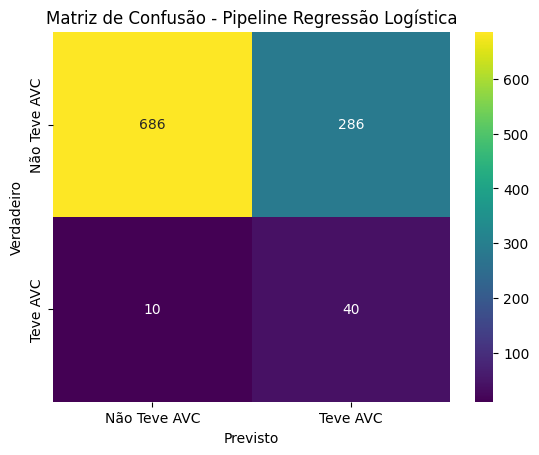

In [604]:
print("Treinando o pipeline...")

pipeline_log_reg.fit(X_train, y_train)
print("Pipeline treinado com sucesso!")

y_pred_pipeline = pipeline_log_reg.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
print(f"\n--- Acurácia do Pipeline (Regressão Logística) ---")
print(f"Acurácia: {accuracy_pipeline:.2f}\n")

print("--- Relatório de Classificação do Pipeline ---")
print(classification_report(y_test, y_pred_pipeline, target_names=['Não Teve AVC', 'Teve AVC']))

print("\n--- Matriz de Confusão do Pipeline ---")
cm_pipeline = confusion_matrix(y_test, y_pred_pipeline)
sns.heatmap(cm_pipeline, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Não Teve AVC', 'Teve AVC'],
            yticklabels=['Não Teve AVC', 'Teve AVC'])
plt.title('Matriz de Confusão - Pipeline Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [605]:
import pickle

# Definir o nome do arquivo para salvar o pipeline
nome_arquivo_pipeline = 'pipeline_regressao_logistica.pkl'

# Salvar o pipeline treinado usando pickle
with open(nome_arquivo_pipeline, 'wb') as f:
    pickle.dump(pipeline_log_reg, f)

print(f"Pipeline exportado com sucesso para '{nome_arquivo_pipeline}' usando pickle.")

Pipeline exportado com sucesso para 'pipeline_regressao_logistica.pkl' usando pickle.
